In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import MathsUtilities as MUte
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.dates as mdates
import CAMP as camp
import copy
import json
from scipy.optimize import curve_fit
pd.set_option('display.max_rows',1000)
%matplotlib inline

## Bring in data

In [2]:
LaTrobeCampInputs = pd.read_excel('CEParamsFLN_Aus.xlsx',sheet_name='ObservedParams',index_col='Cultivar',engine='openpyxl')
LaTrobeLAData = pd.read_excel('C:\\GitHubRepos\\npi\Analysis\\Controlled Environment\\CEParamPTQ_Aus.xlsx',index_col='Cultivar',engine='openpyxl')
LaTrobeCampInputs.columns = ['FLN_LV', 'FLN_LN', 'FLN_SV', 'FLN_SN','VrnTreatTemp','VrnTreatDuration','Expt']

LaTrobeCampInputs.loc[:,'TreatmentPTQ_S'] = 0.595862
LaTrobeCampInputs.loc[:,'TreatmentPTQ_L'] = 1.2266207
LaTrobeCampInputs.loc[:,'TtEmerge'] = 90
LaTrobeCampInputs.loc[:,'k'] = camp.CampConstants['k']
LaTrobeCampInputs.loc[:,'VernalisationThreshold'] = camp.CampConstants['VernalisationThreshold']
LaTrobeCampInputs.loc[:,'MethalationThreshold'] = camp.CampConstants['MethalationThreshold']
LaTrobeCampInputs.loc[:,'maxLAR'] = [LaTrobeLAData.loc[c,'[Phenology].MaxLAR.FixedValue'] for c in LaTrobeLAData.index]
LaTrobeCampInputs.loc[:,'minLAR'] = 0.005
LaTrobeCampInputs.loc[:,'PTQhf'] = [LaTrobeLAData.loc[c,'[Phenology].PTQhf.FixedValue'] for c in LaTrobeLAData.index]
LaTrobeCampInputs.loc[:,'Expt'] = 'LaTrobe'

In [3]:
LincolnCampInputs = pd.read_excel('CEParamsFLN_NZ96.xlsx',sheet_name='ObservedParams',index_col='Cultivar',engine='openpyxl')
LincolnLAData = pd.read_excel('C:\\GitHubRepos\\npi\Analysis\\Controlled Environment\\CEParamPTQ_NZ.xlsx',index_col='Cultivar',engine='openpyxl')
#namemap = {'CRWT153':'crwt153', 'Amarok':'amarok', 'Otane':'otane', 'Saracen':'saracen', 'BattenSpring':'battenspring','BattenWinter':'battenwinter'}
#LincolnLAData.index = [namemap[x] for x in LincolnLAData.index]
LincolnCampInputs.columns = ['FLN_LV', 'FLN_SV', 'FLN_LN', 'FLN_SN','VrnTreatTemp','VrnTreatDuration','Expt']
LincolnCampInputs.loc[:,'maxLAR'] = 0.014
LincolnCampInputs.loc[:,'minLAR'] = 0.005
LincolnCampInputs.loc[:,'PTQhf'] = 0.6
for c in LincolnLAData.index:
    LincolnCampInputs.loc[c,'maxLAR'] = LincolnLAData.loc[c,'[Phenology].MaxLAR.FixedValue']
    LincolnCampInputs.loc[c,'PTQhf'] = LincolnLAData.loc[c,'[Phenology].PTQhf.FixedValue']
LincolnCampInputs.loc[:,'TreatmentPTQ_S'] = 0.854327
LincolnCampInputs.loc[:,'TreatmentPTQ_L'] = 1.708475
LincolnCampInputs.loc[:,'TtEmerge'] = 90
LincolnCampInputs.loc[:,'k'] = camp.CampConstants['k']
LincolnCampInputs.loc[:,'VernalisationThreshold'] = camp.CampConstants['VernalisationThreshold']
LincolnCampInputs.loc[:,'MethalationThreshold'] = camp.CampConstants['MethalationThreshold']
LincolnCampInputs.loc[:,'Expt'] = 'Lincoln'

In [4]:
CampInputs = pd.concat([LaTrobeCampInputs,LincolnCampInputs])
CampInputs.sort_index(inplace=True)

In [5]:
Ind = camp.CalcCultivarVrnCoeffs(CampInputs.loc['Axe',:].to_dict()).index
CampVrnParams = pd.DataFrame(index=CampInputs.index,columns = Ind)
for c in CampVrnParams.index:
    CampVrnParams.loc[c,:] = camp.CalcCultivarVrnCoeffs(CampInputs.loc[c,:].to_dict())
    CampVrnParams.loc[c,'Expt'] = CampInputs.loc[c,'Expt']
    CampVrnParams.loc[c,'MinLN'] = CampVrnParams.loc[c,'FLN_LV']
    CampVrnParams.loc[c,'PpLN'] = CampVrnParams.loc[c,'FLN_SV'] - CampVrnParams.loc[c,'MinLN']
    CampVrnParams.loc[c,'VrnLN'] = CampVrnParams.loc[c,'FLN_SN'] - CampVrnParams.loc[c,'MinLN'] -CampVrnParams.loc[c,'PpLN']
    CampVrnParams.loc[c,'VxPLN'] = CampVrnParams.loc[c,'FLN_LN'] - CampVrnParams.loc[c,'MinLN'] - CampVrnParams.loc[c,'VrnLN']

C:\Users\Cflhxb\AppData\Local\anaconda3\lib\CAMP.py:412: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  data = pd.Series()
C:\Users\Cflhxb\AppData\Local\anaconda3\lib\CAMP.py:412: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  data = pd.Series()
C:\Users\Cflhxb\AppData\Local\anaconda3\lib\CAMP.py:412: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  data = pd.Series()
C:\Users\Cflhxb\AppData\Local\anaconda3\lib\CAMP.py:412: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  data = pd.Series()
C:\Users\Cflhxb\AppData\Local\anaconda3\lib\

In [6]:
CampVrnParams.loc[:,'VxPLN']

Cultivar
374_q7_a4               -1.000000e+00
Adv08_0008              -1.333333e+00
Amarok                  -2.951748e+00
Axe                     -3.666667e+00
BattenSpring                      NaN
BattenWinter                      NaN
Battenspring            -3.415317e+00
Battenwinter            -8.802778e+00
Beaufort                -5.000000e+00
Bennett                 -1.333333e+00
Bolac                   -6.666667e-01
Braewood                -3.333333e-01
CRWT153                 -1.045328e+01
Calingiri               -2.333333e+00
Catalina                -1.333333e+00
Claire                  -1.100000e+01
Condo                    6.666667e-01
Crusader                 4.666667e+00
Csirow002                1.000000e+00
Csirow003                2.000000e+00
Csirow005                1.666667e+00
Csirow007                2.666667e+00
Csirow011               -3.000000e+00
Csirow018                1.666667e+00
Csirow021                3.333333e-01
Csirow023                0.000000e+00
Csi

In [7]:
CampVrnParams.to_excel('CampVrnParams.xlsx')

In [8]:
Genotypes = CampVrnParams.index.values
sorted(Genotypes, key=str.casefold)

['374_q7_a4',
 'acbarrie',
 'Adv08_0008',
 'afghanistan_48',
 'afghanistan_55',
 'alberic',
 'alsen',
 'Amarok',
 'Axe',
 'BattenSpring',
 'Battenspring',
 'BattenWinter',
 'Battenwinter',
 'baxter',
 'Beaufort',
 'Bennett',
 'Bolac',
 'Braewood',
 'Calingiri',
 'Catalina',
 'cenatur',
 'chara',
 'Claire',
 'cnt_1',
 'Condo',
 'consort',
 'Crusader',
 'crwt146',
 'CRWT153',
 'crwt168',
 'Csirow002',
 'Csirow003',
 'Csirow005',
 'Csirow007',
 'Csirow011',
 'Csirow018',
 'Csirow021',
 'Csirow023',
 'Csirow027',
 'Csirow029',
 'Csirow073',
 'Csirow077',
 'Csirow087',
 'Csirow102',
 'Csirow105',
 'Cutlass',
 'darius_gli_di',
 'Derrimut',
 'doyo_333',
 'doyo_4',
 'doyo_7',
 'doyo_924',
 'doyo_961',
 'Eaglehawk',
 'einstein',
 'Ellison',
 'empress',
 'Emu_rock',
 'etaya_26',
 'etaya_28',
 'etaya_31',
 'etaya_32',
 'etaya_33',
 'etaya_34',
 'ex_iraq_39',
 'ex_iraq_40',
 'ex_iraq_50',
 'ex_morocco_27',
 'excede',
 'Forrest',
 'fortunato_p_s_681',
 'france_ci_2241',
 'Gauntlet',
 'genghis',
 'g

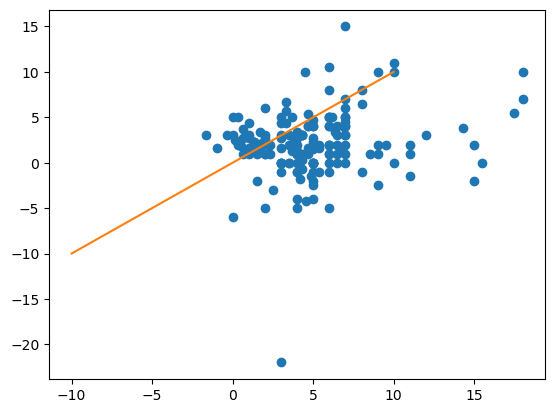

In [9]:
plt.plot(CampInputs.FLN_LV - CampInputs.FLN_SV,CampInputs.FLN_LN - CampInputs.FLN_SN,'o')
plt.plot([-10,10],[-10,10])

## Janz and Yitpi are common to both CE experiments

In [10]:
def MarkerProperties(g,highlights,Expt):
    if g in highlights:
        col = 'r'
        mark = 's-'
        size = 10
    else:
        col = 'k'
        mark = 'o-'
        size = 7   
    
    if (Expt == 'LaTrobe'):
        fill = col
    else:
        fill = 'white'
    return (col,mark,size,fill)

def SetTicks(xmin,xmax,ymin,ymax):
    plt.grid()
    plt.tick_params(axis='y', which='both', labelleft=False, left=False)
    xrange = xmax-xmin
    if xrange < 10:
        intival = 1
    else:
        intival = 2
    plt.yticks(range(ymin,ymax,intival))
    plt.xticks(range(xmin,xmax,intival))
    plt.ylim(ymin,ymax)
    plt.xlim(xmin,xmax)
    
def MakeResponsePlot(Title,highlights,Trts,sortT,xlab,xmin,xmax,ymin,ymax,LabLegPos):
    markers = ['o','^','s']
    SortedParams = CampVrnParams.sort_values(by=sortT)
    LincLedg = True
    LaTrLedg = True
    ypos=0
    for g in SortedParams.index:
        col,mark,size,fill = MarkerProperties(g,highlights,CampInputs.loc[g,'Expt'])
        xs = []
        for t in Trts:
            xs.append(SortedParams.loc[g,t])
        plt.plot(xs,[ypos]*len(xs),'-', ms=size,mec=col,mfc=fill,mew=2,color=col,lw=1)
        plt.text(xmin-(xmax-xmin)*.15,ypos,g,verticalalignment='center',fontsize=size,color=col)
        Lab = [None] * len(Trts)
        tpos = 0
        for t in Trts:
            if (LincLedg == True) and (CampVrnParams.Expt[g]=='Lincoln'):
                LincLedg = False
                Lab = []
                for t in Trts:
                    Lab.append(t.split("_")[LabLegPos] + ' Lincoln')
            if (LaTrLedg == True) and (CampVrnParams.Expt[g]=='LaTrobe'):
                LaTrLedg = False
                Lab = []
                for t in Trts:
                    Lab.append(t.split("_")[LabLegPos] + ' Latrobe')
            plt.plot(SortedParams.loc[g,t],ypos,markers[tpos], ms=size,mec=col,mfc=fill,mew=1,color=col,lw=1,label=Lab[tpos])
            tpos+=1
        ypos+=1
    SetTicks(xmin,xmax,ymin,ymax)
    plt.title(Title, fontsize=30)
    plt.legend(loc = 'lower right')
    plt.xlabel(xlab)

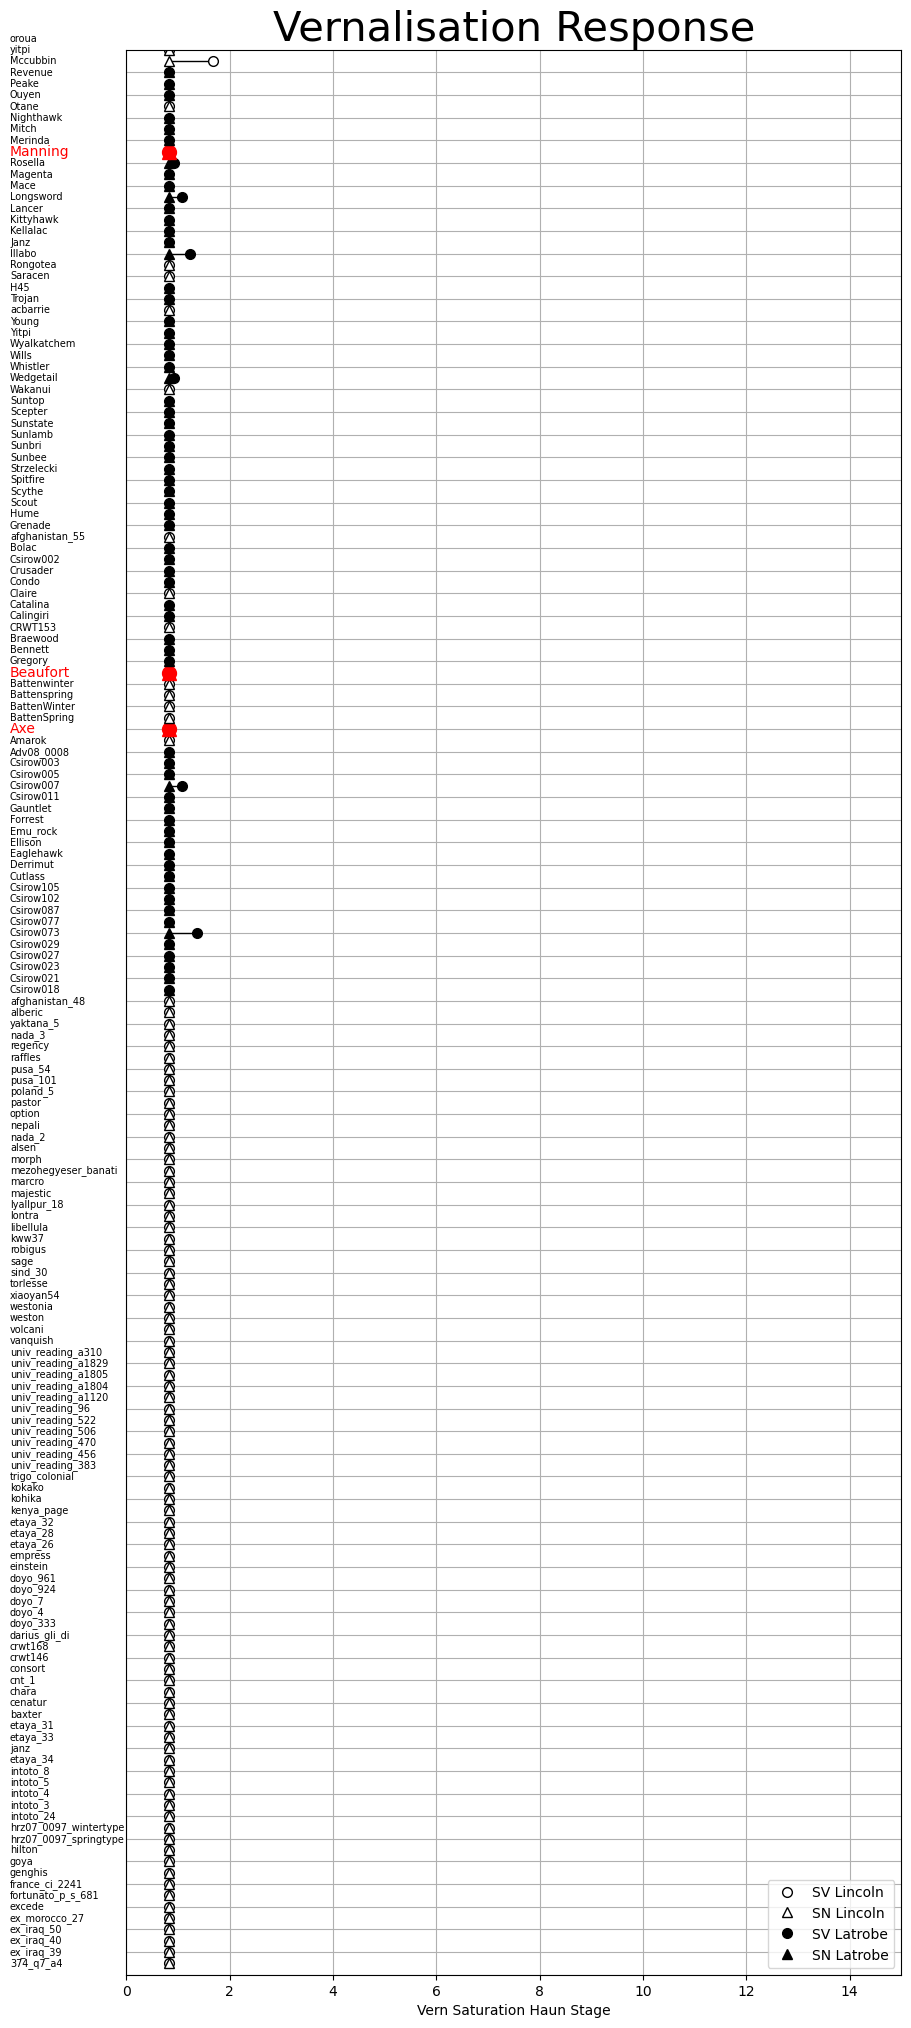

In [11]:
Graph = plt.figure(figsize=(10,25))
ax = Graph.add_subplot(1,1,1)
MakeResponsePlot(Title = 'Vernalisation Response',
                 highlights = ['Axe','Beaufort','Manning'],
                 Trts = ['VSBP_SV','VSBP_SN'],
                 sortT = 'VSBP_SN',
                 xlab = 'Vern Saturation Haun Stage',
                 xmin = 0,
                 xmax = 15,
                 ymin = -1,
                 ymax = 169,
                 LabLegPos=1)

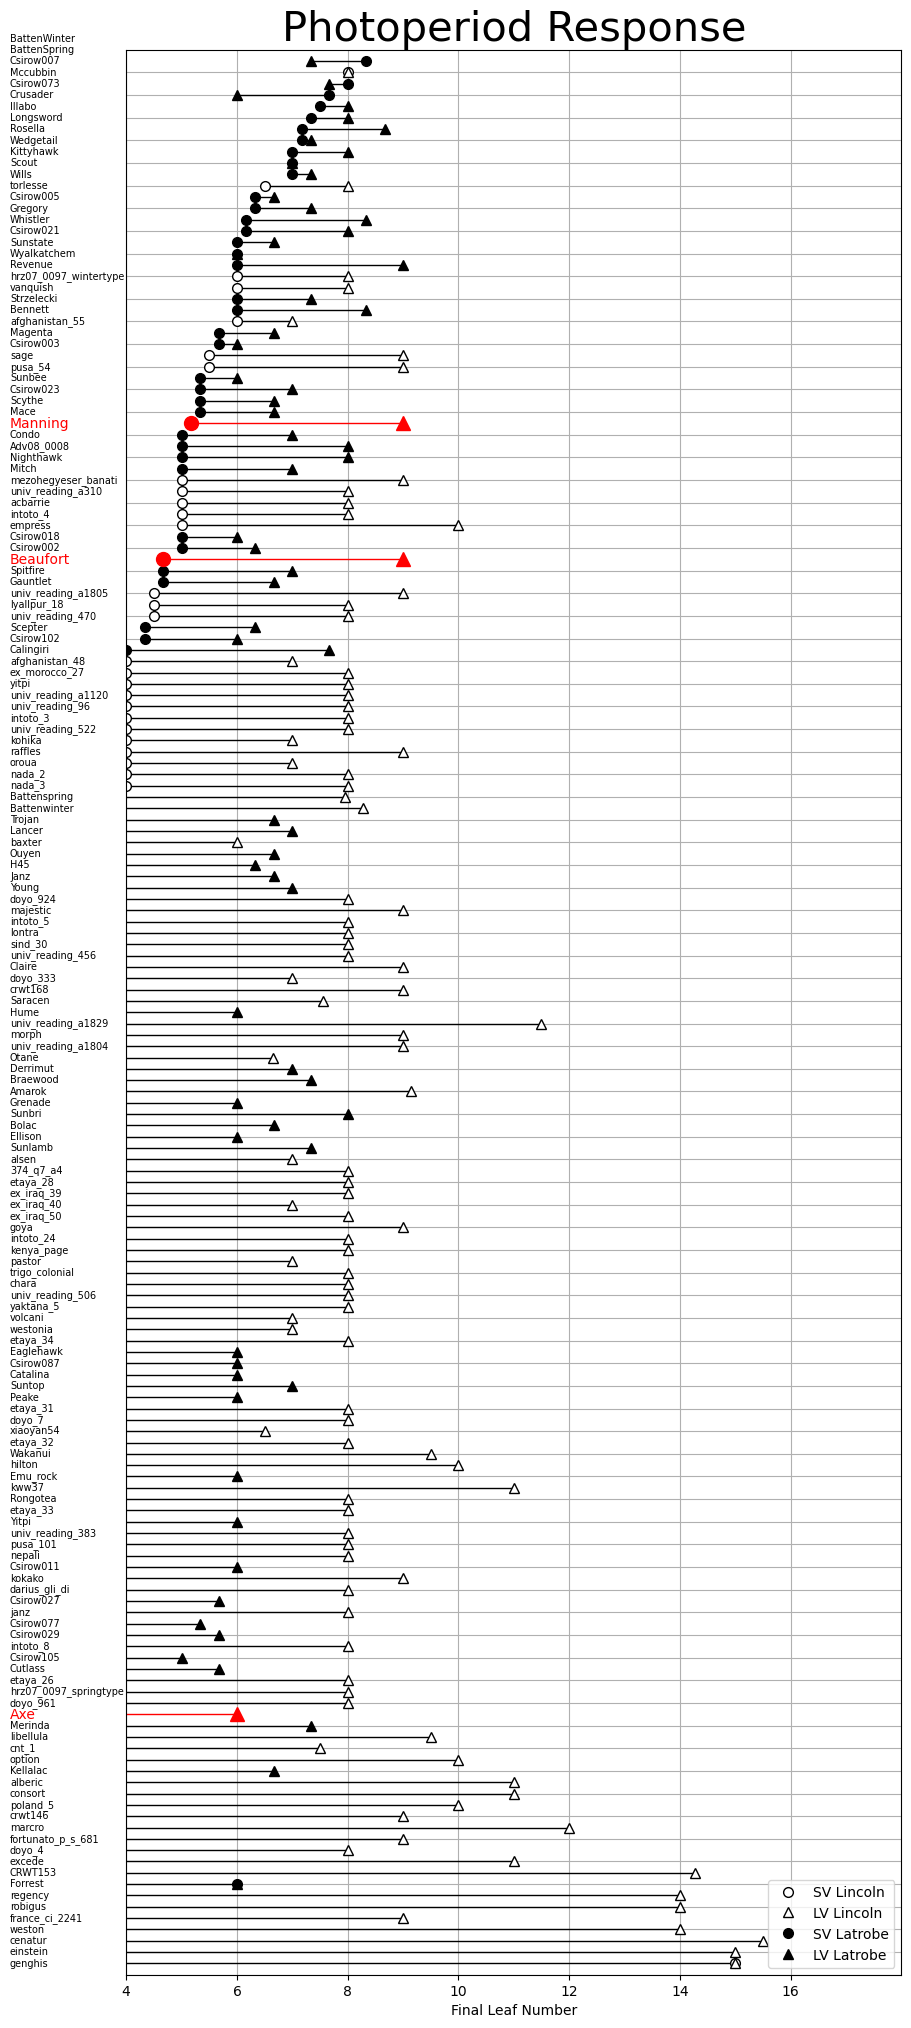

In [12]:
Graph = plt.figure(figsize=(10,25))
ax = Graph.add_subplot(1,1,1)
MakeResponsePlot(Title = 'Photoperiod Response',
                 highlights = ['Axe','Beaufort','Manning'],
                 Trts = ['FLN_SV','FLN_LV'],
                 sortT = 'FLN_SV',
                 xlab = 'Final Leaf Number',
                 xmin = 4,
                 xmax = 18,
                 ymin = -1,
                 ymax = 169,
                 LabLegPos=1)

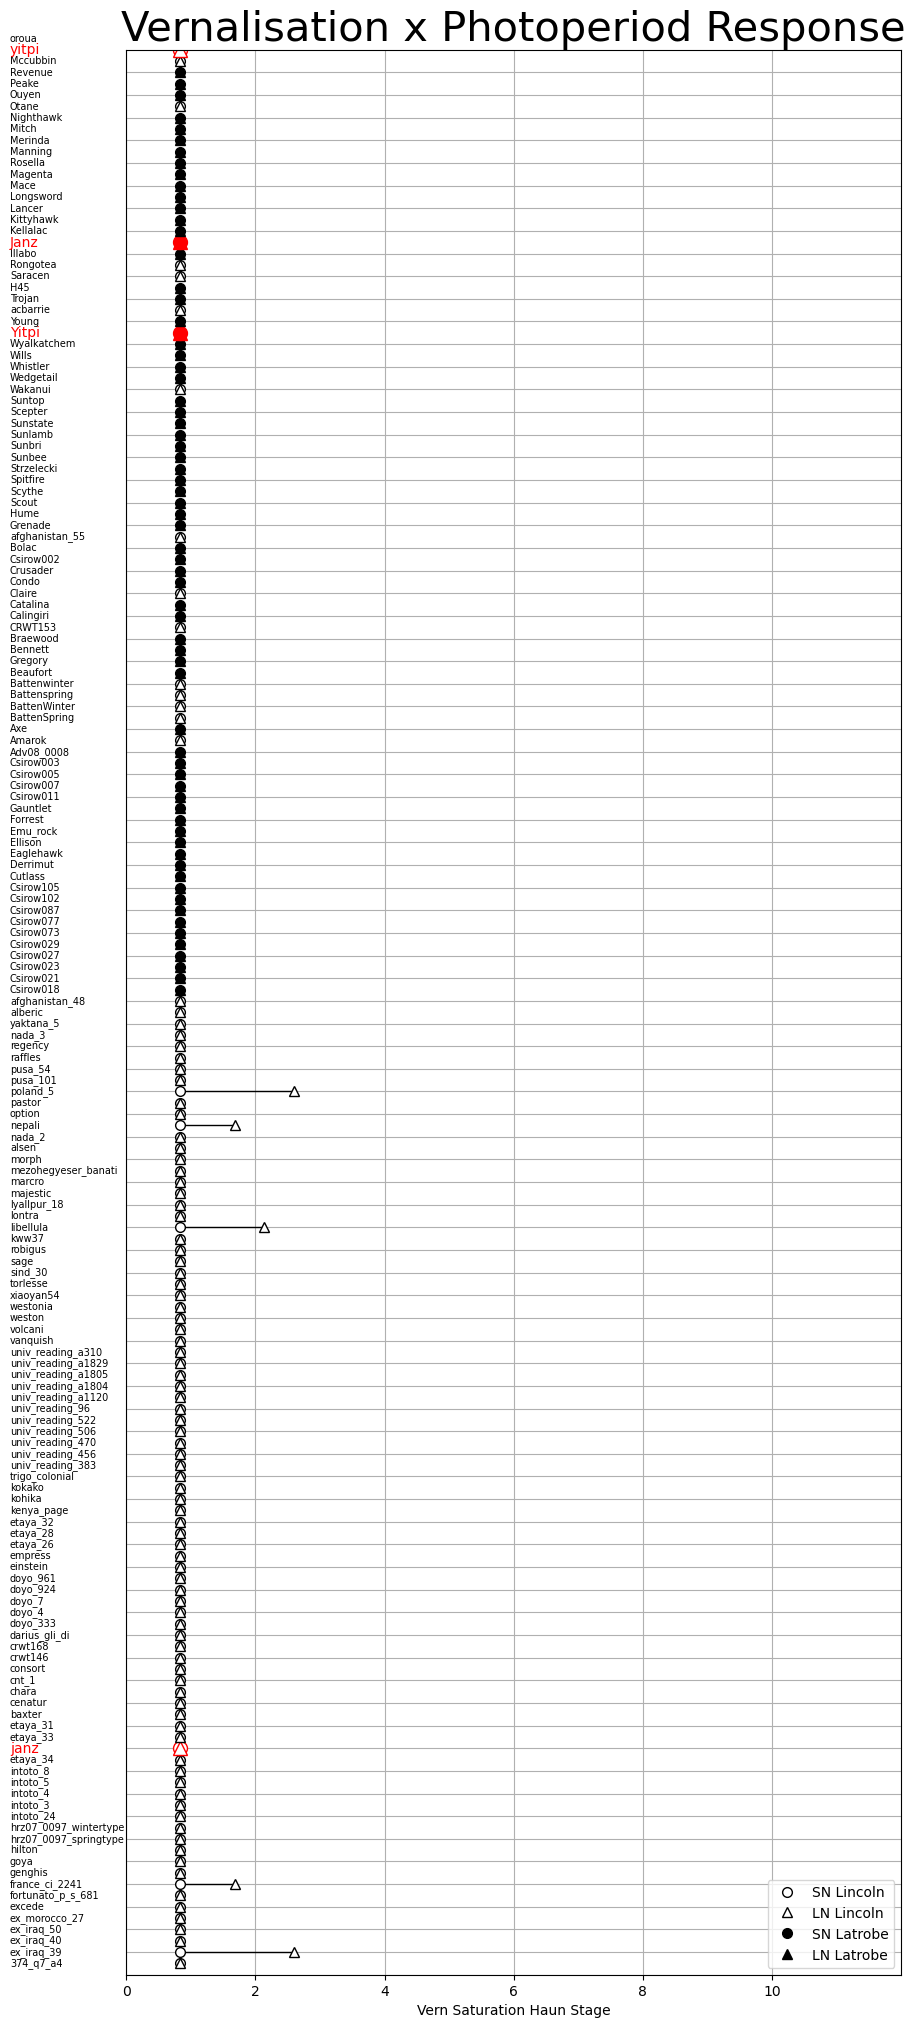

In [13]:
Graph = plt.figure(figsize=(10,25))
ax = Graph.add_subplot(1,1,1)
MakeResponsePlot(Title = 'Vernalisation x Photoperiod Response',
                 highlights = ['Janz','janz','Yitpi','yitpi'],
                 Trts = ['VSBP_SN','VSBP_LN'],
                 sortT = 'VSBP_SN',
                 xlab = 'Vern Saturation Haun Stage',
                 xmin = 0,
                 xmax = 12,
                 ymin = -1,
                 ymax = 169,
                 LabLegPos=1)

In [14]:
CampVrnParams.MaxMethColdVern1

Cultivar
374_q7_a4                     0.0
Adv08_0008                    0.0
Amarok                        0.0
Axe                           0.0
BattenSpring                  0.0
BattenWinter                  0.0
Battenspring                  0.0
Battenwinter                  0.0
Beaufort                      0.0
Bennett                       0.0
Bolac                         0.0
Braewood                      0.0
CRWT153                       0.0
Calingiri                     0.0
Catalina                      0.0
Claire                        0.0
Condo                         0.0
Crusader                      0.0
Csirow002                     0.0
Csirow003                     0.0
Csirow005                     0.0
Csirow007                     0.0
Csirow011                     0.0
Csirow018                     0.0
Csirow021                     0.0
Csirow023                     0.0
Csirow027                     0.0
Csirow029                     0.0
Csirow073                     0.0
Csiro

<Axes: xlabel='Cultivar'>

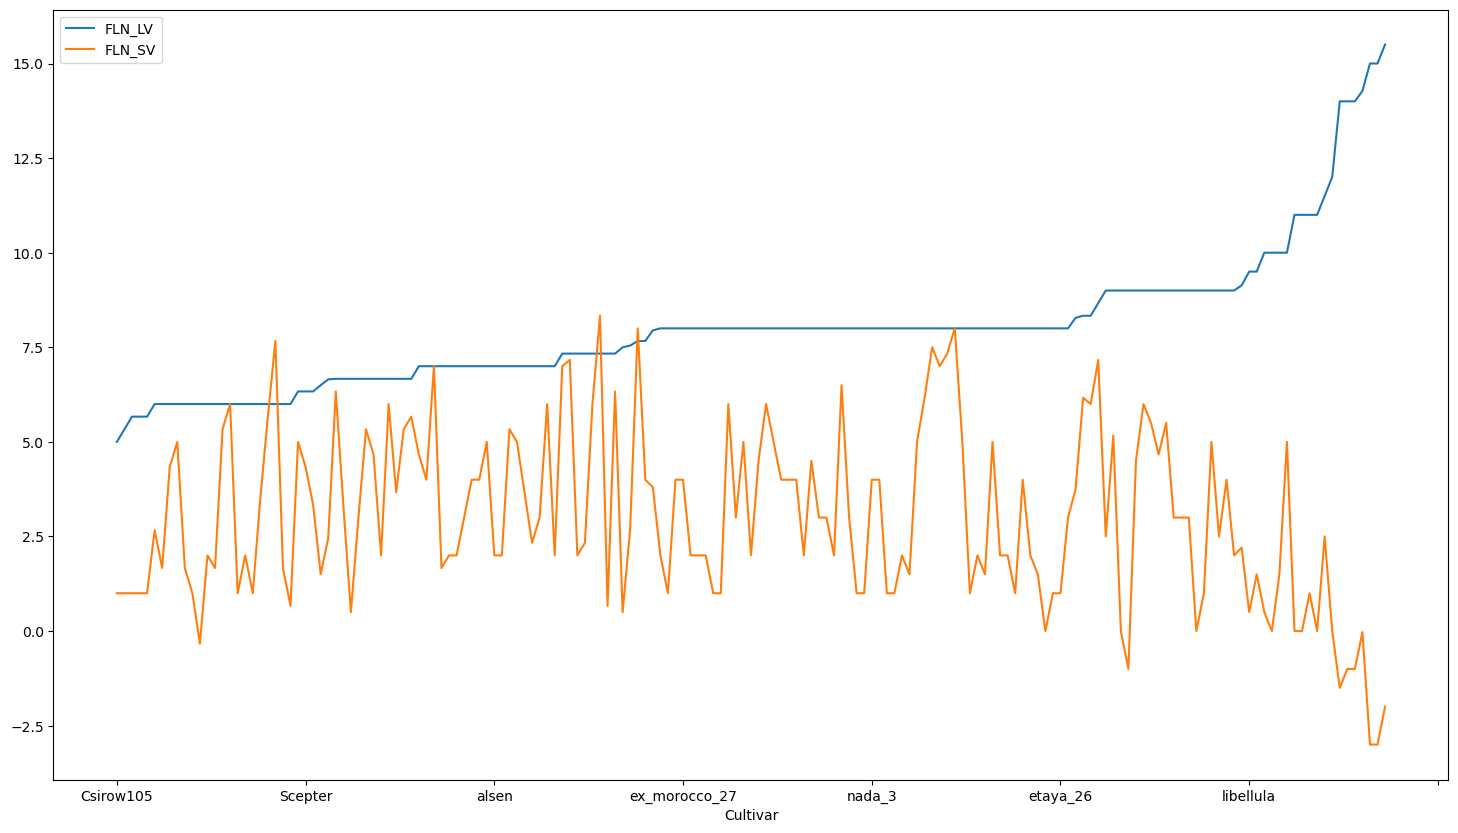

In [15]:
CampVrnParams.sort_values('FLN_LV').loc[:,['FLN_LV','FLN_SV']].plot(figsize=(18,10))

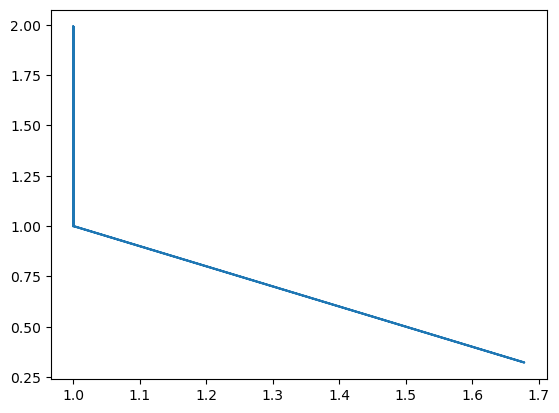

In [16]:
plt.plot(CampVrnParams.loc[:,'MethColdVern1AtTrans_SV']+1,CampVrnParams.loc[:,'pVrn2AtVSBP_LN'])

In [17]:
CampVrnParams.sort_values('FLN_LV').loc['BattenWinter',:]

maxLAR                       0.009
minLAR                         NaN
PTQhf                          0.2
FLN_LV                         NaN
FLN_LN                         NaN
FLN_SV                         NaN
FLN_SN                         NaN
BasePhyllochron                NaN
EmergBP                        NaN
VernTreatBP                    NaN
MinBPVsTs                      2.5
VSBP_FL_LV                     NaN
IntFLNvsTSHS                  2.85
TSBP_LV                        NaN
TSBP_LN                        NaN
TSBP_SV                        NaN
TSBP_SN                        NaN
PPS                            0.0
VSBP_LV                      0.825
VSBP_LN                      0.825
VSBP_SV                      0.825
VSBP_SN                      0.825
MaxDVrn3                       0.4
BaseDVrn3                      0.4
BaseDVrn1                      NaN
VS                             0.0
BaseVrn1AtVSBP_SV              NaN
MethColdVern1AtTrans_SV        0.0
ColdVrn1AtVSBP_SV   

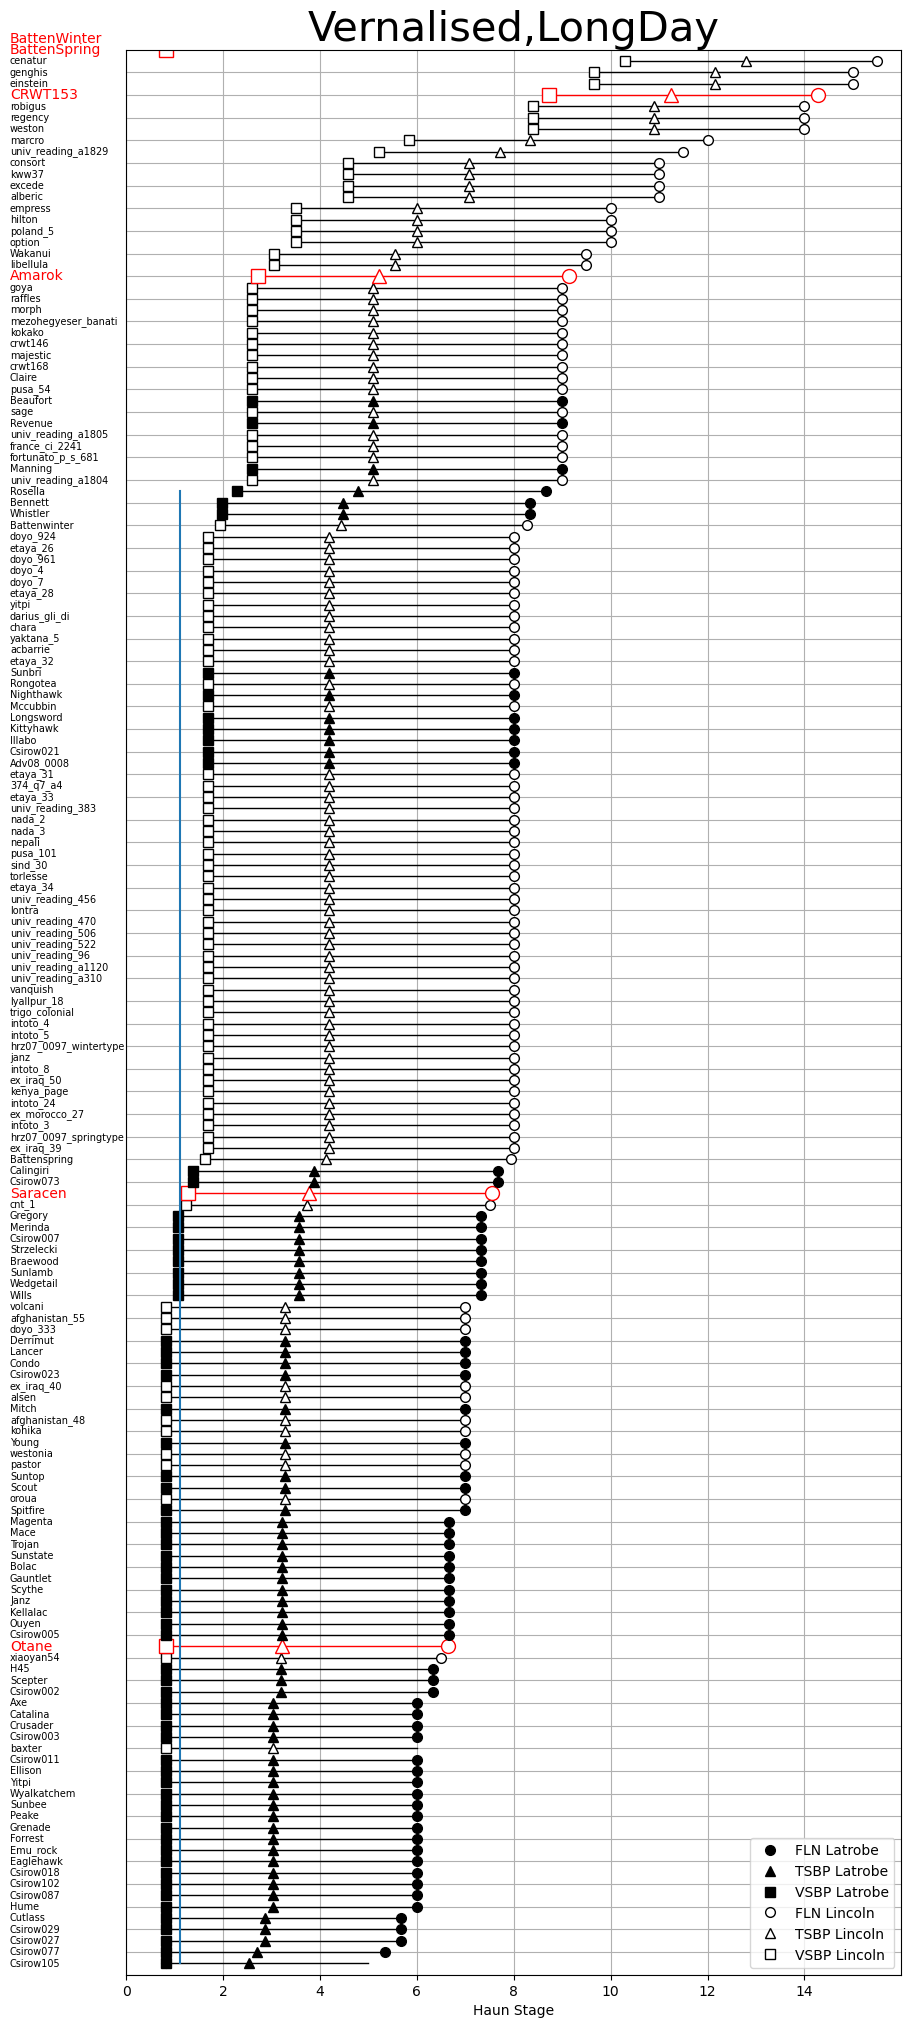

In [18]:
Graph = plt.figure(figsize=(10,25))
ax = Graph.add_subplot(1,1,1)
MakeResponsePlot(Title = 'Vernalised,LongDay',
                 highlights = ['Otane','BattenSpring','Saracen','Amarok','BattenWinter','CRWT153'],#['Janz','janz','Yitpi','yitpi'],
                 Trts = ['FLN_LV','TSBP_LV','VSBP_LV'],
                 sortT = 'FLN_LV',
                 xlab = 'Haun Stage',
                 xmin = 0,
                 xmax = 16,
                 ymin = -1,
                 ymax = 169,
                 LabLegPos=0)
plt.plot([1.1,1.1],[0,130])

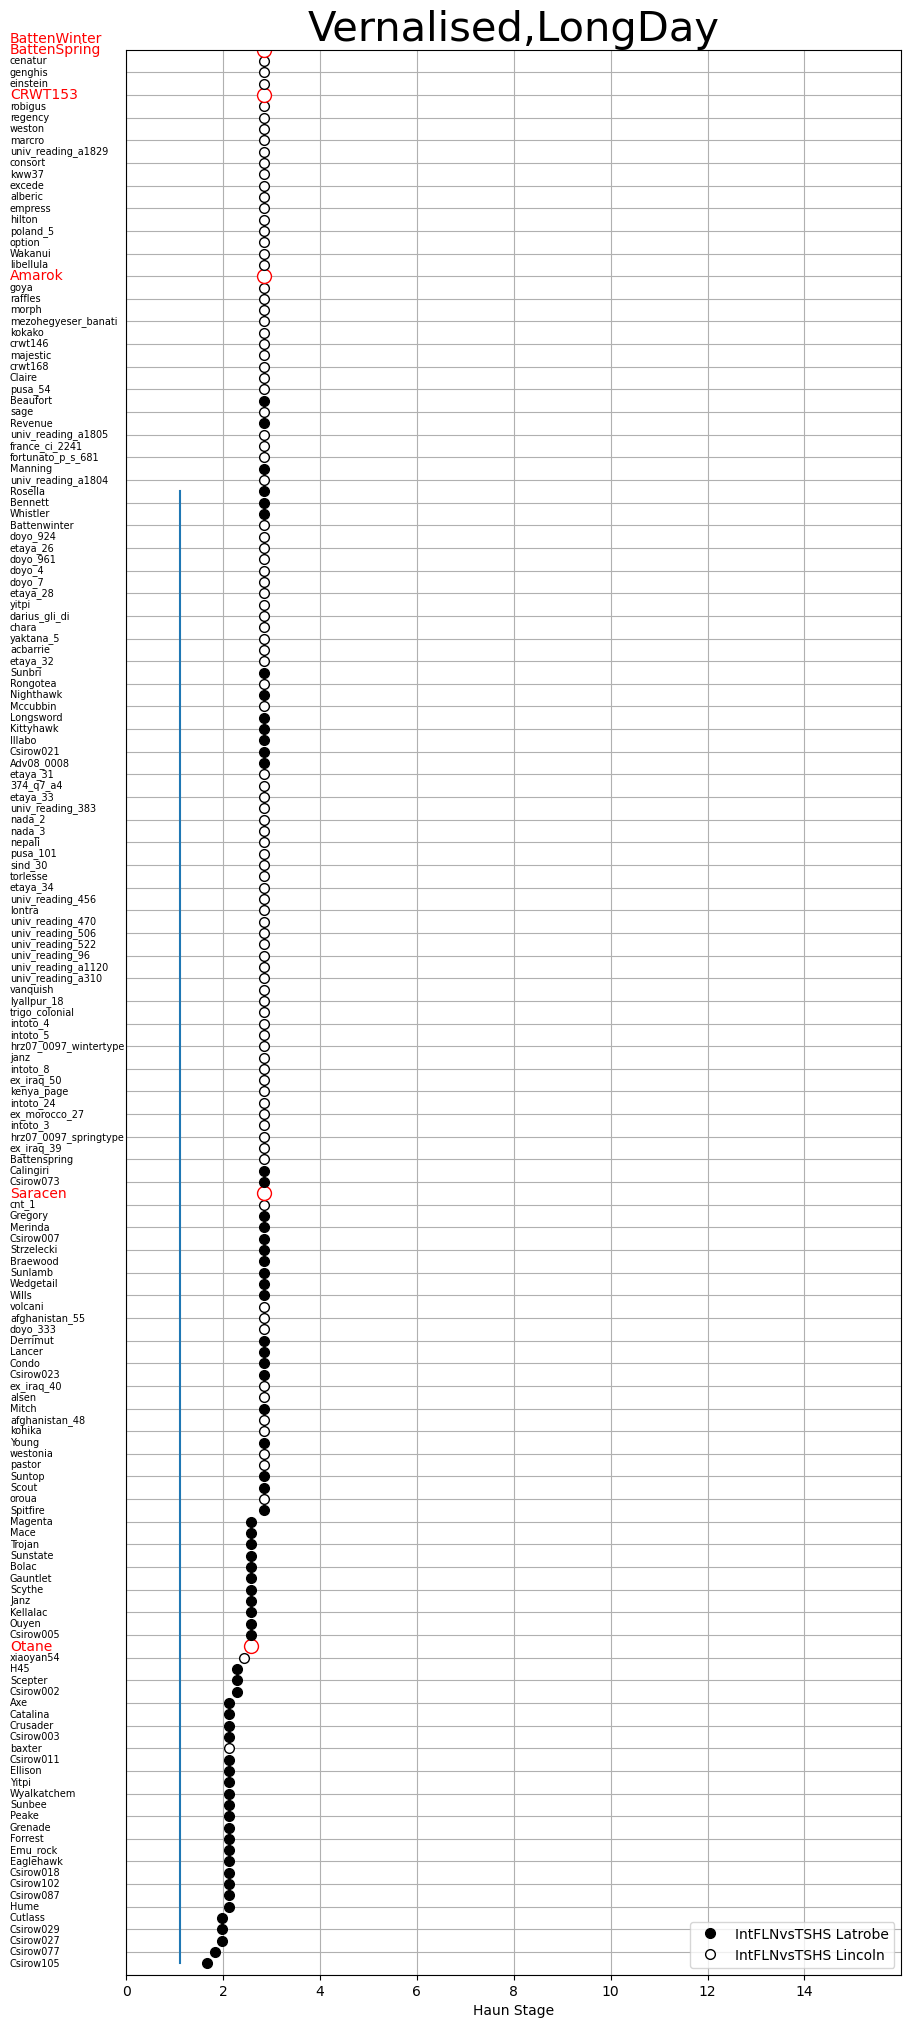

In [19]:
Graph = plt.figure(figsize=(10,25))
ax = Graph.add_subplot(1,1,1)
MakeResponsePlot(Title = 'Vernalised,LongDay',
                 highlights = ['Otane','BattenSpring','Saracen','Amarok','BattenWinter','CRWT153'],#['Janz','janz','Yitpi','yitpi'],
                 Trts = ['IntFLNvsTSHS'],
                 sortT = 'FLN_LV',
                 xlab = 'Haun Stage',
                 xmin = 0,
                 xmax = 16,
                 ymin = -1,
                 ymax = 169,
                 LabLegPos=0)
plt.plot([1.1,1.1],[0,130])

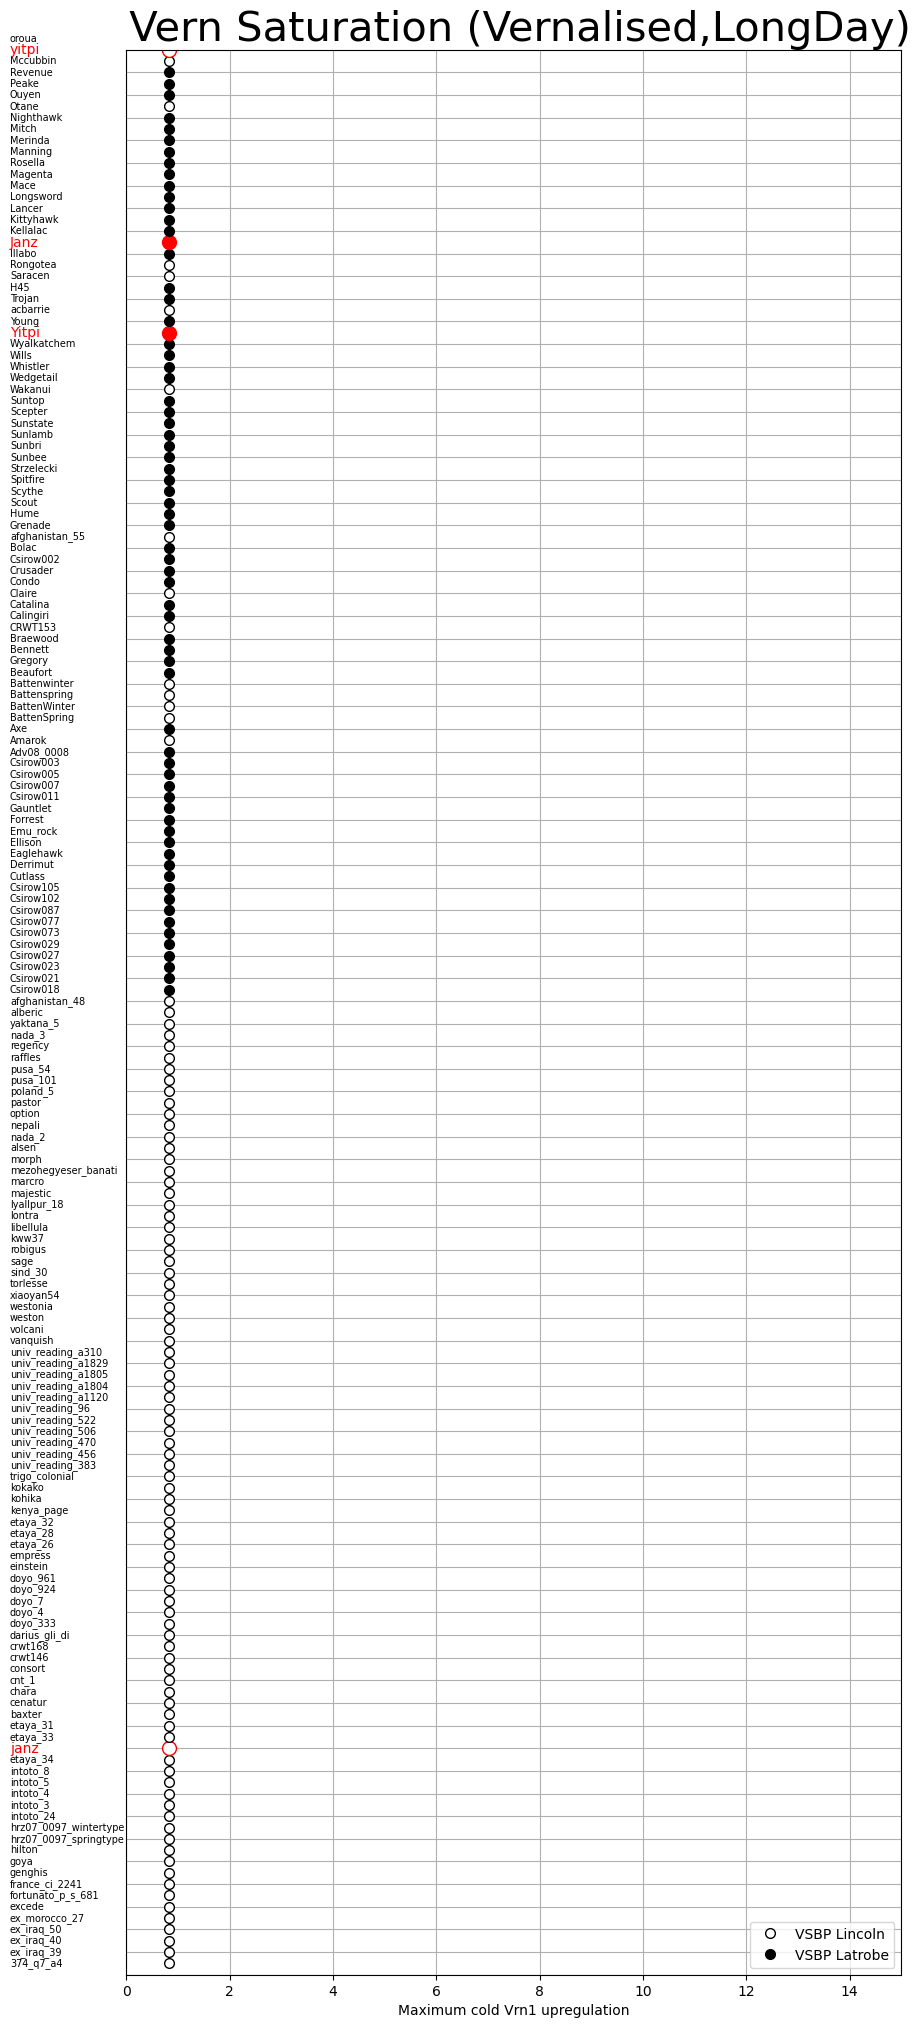

In [20]:
Graph = plt.figure(figsize=(10,25))
ax = Graph.add_subplot(1,1,1)
MakeResponsePlot(Title = ' Vern Saturation (Vernalised,LongDay)',
                 highlights = ['Janz','janz','Yitpi','yitpi'],
                 Trts = ['VSBP_SN'],
                 sortT = 'VSBP_SN',
                 xlab = 'Maximum cold Vrn1 upregulation',
                 xmin = 0,
                 xmax = 15,
                 ymin = -1,
                 ymax = 169,
                 LabLegPos=0)

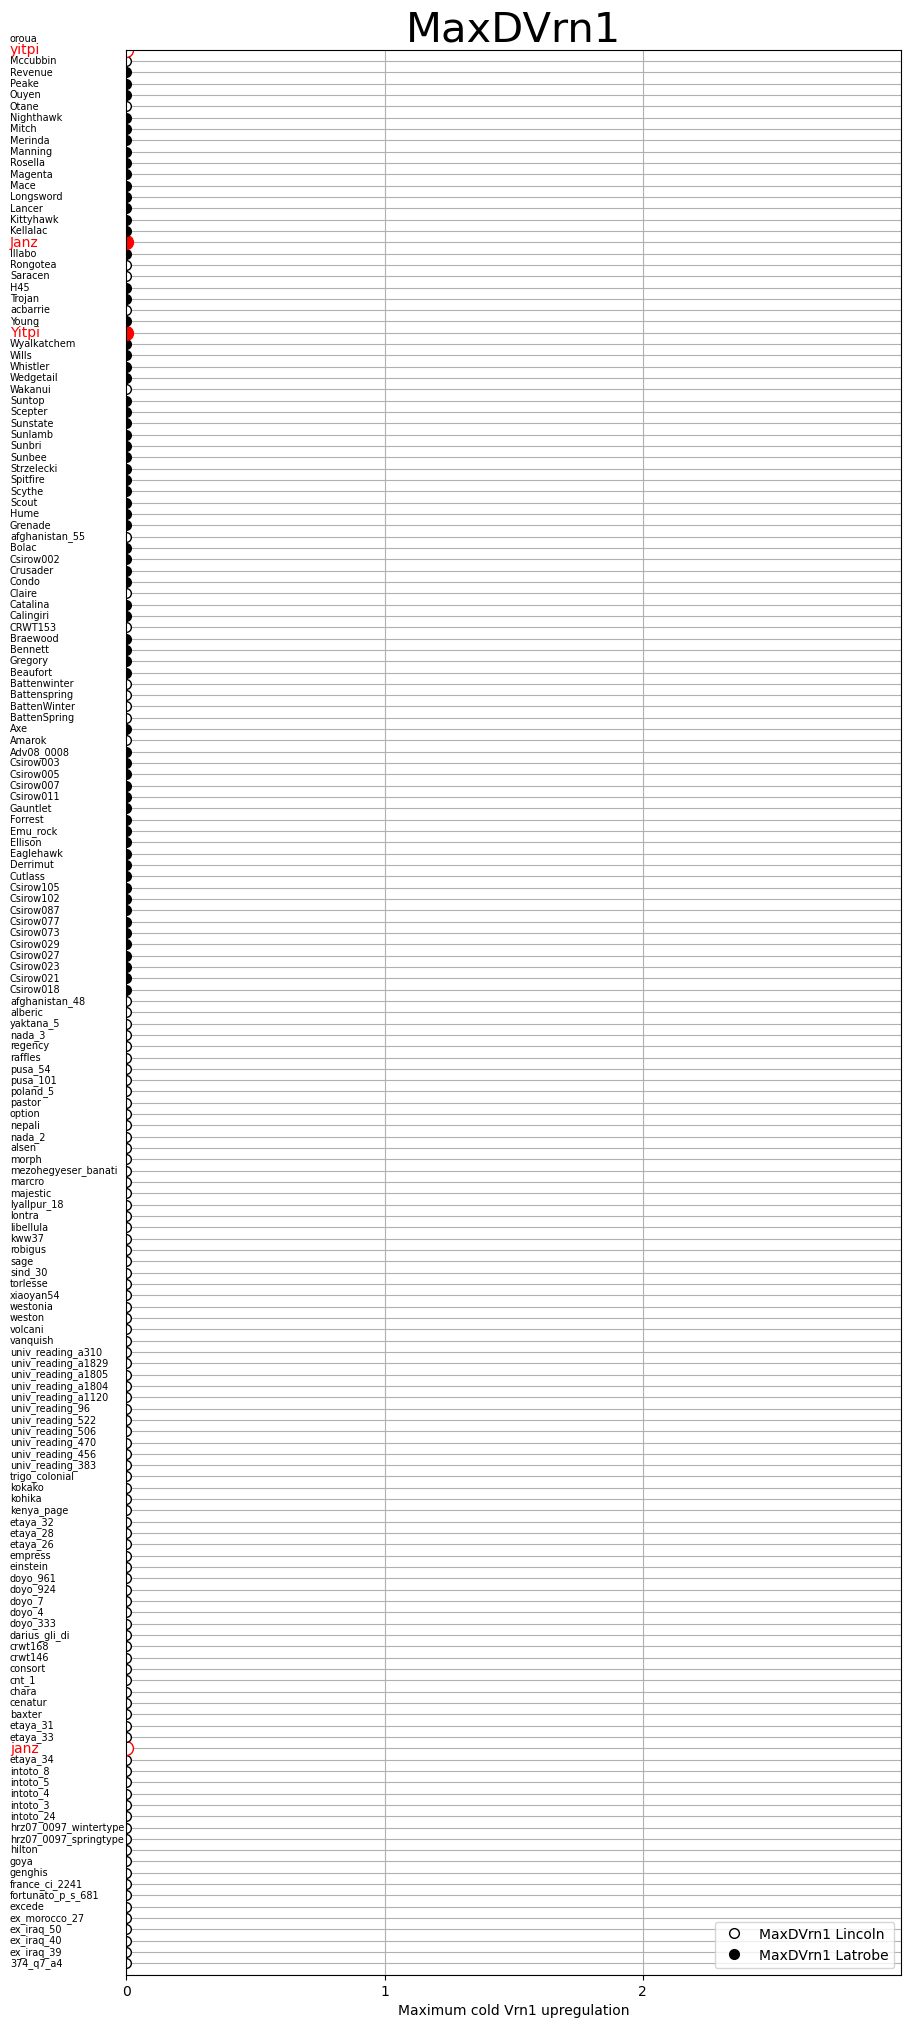

In [21]:
Graph = plt.figure(figsize=(10,25))
ax = Graph.add_subplot(1,1,1)
MakeResponsePlot(Title = 'MaxDVrn1',
                 highlights = ['Janz','janz','Yitpi','yitpi'],
                 Trts = ['MaxDVrn1'],
                 sortT = 'MaxDVrn1',
                 xlab = 'Maximum cold Vrn1 upregulation',
                 xmin = 0,
                 xmax = 3,
                 ymin = -1,
                 ymax = 169,
                 LabLegPos=0)

In [22]:
CampVrnParams.loc[:,'FastestVrn1'] = CampVrnParams.loc[:,'BaseDVrn1'] + CampVrnParams.loc[:,'MaxDVrn1']

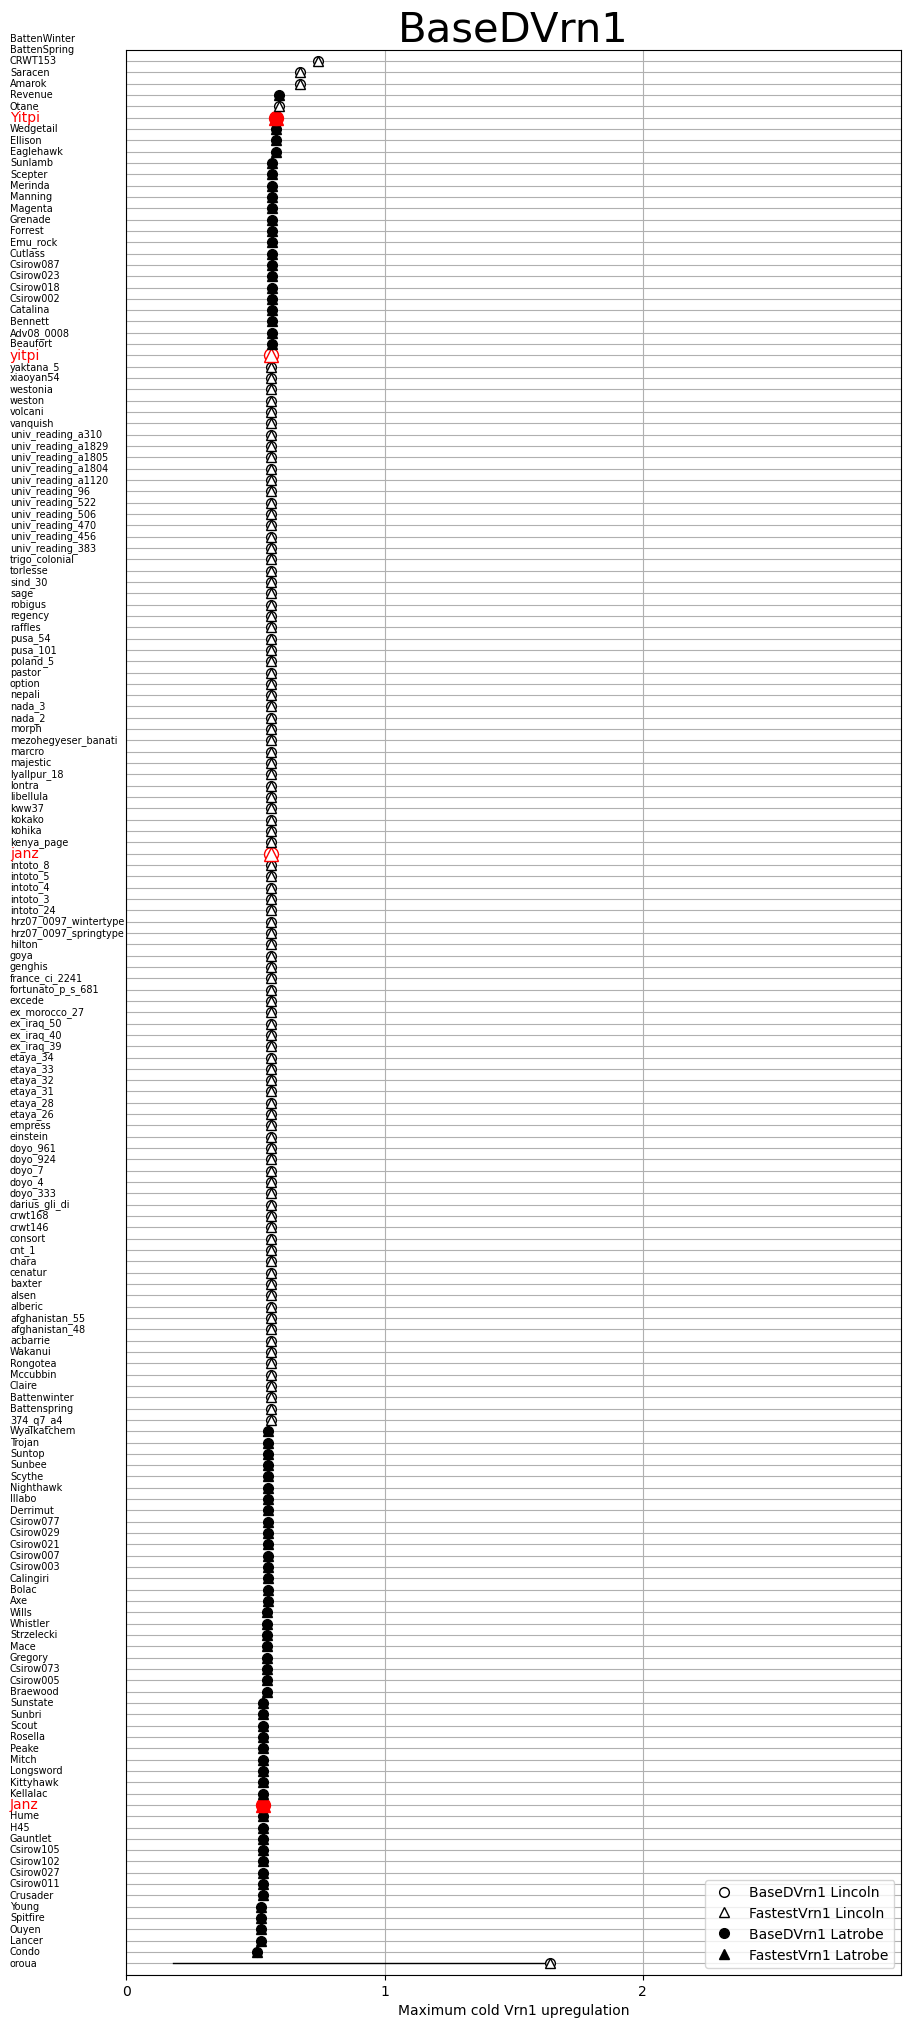

In [23]:
Graph = plt.figure(figsize=(10,25))
ax = Graph.add_subplot(1,1,1)
MakeResponsePlot(Title = 'BaseDVrn1',
                 highlights = ['Janz','janz','Yitpi','yitpi'],
                 Trts = ['BaseDVrn1','FastestVrn1'],
                 sortT = ['BaseDVrn1','FastestVrn1'],
                 xlab = 'Maximum cold Vrn1 upregulation',
                 xmin = 0,
                 xmax = 3,
                 ymin = -1,
                 ymax = 169,
                 LabLegPos=0)

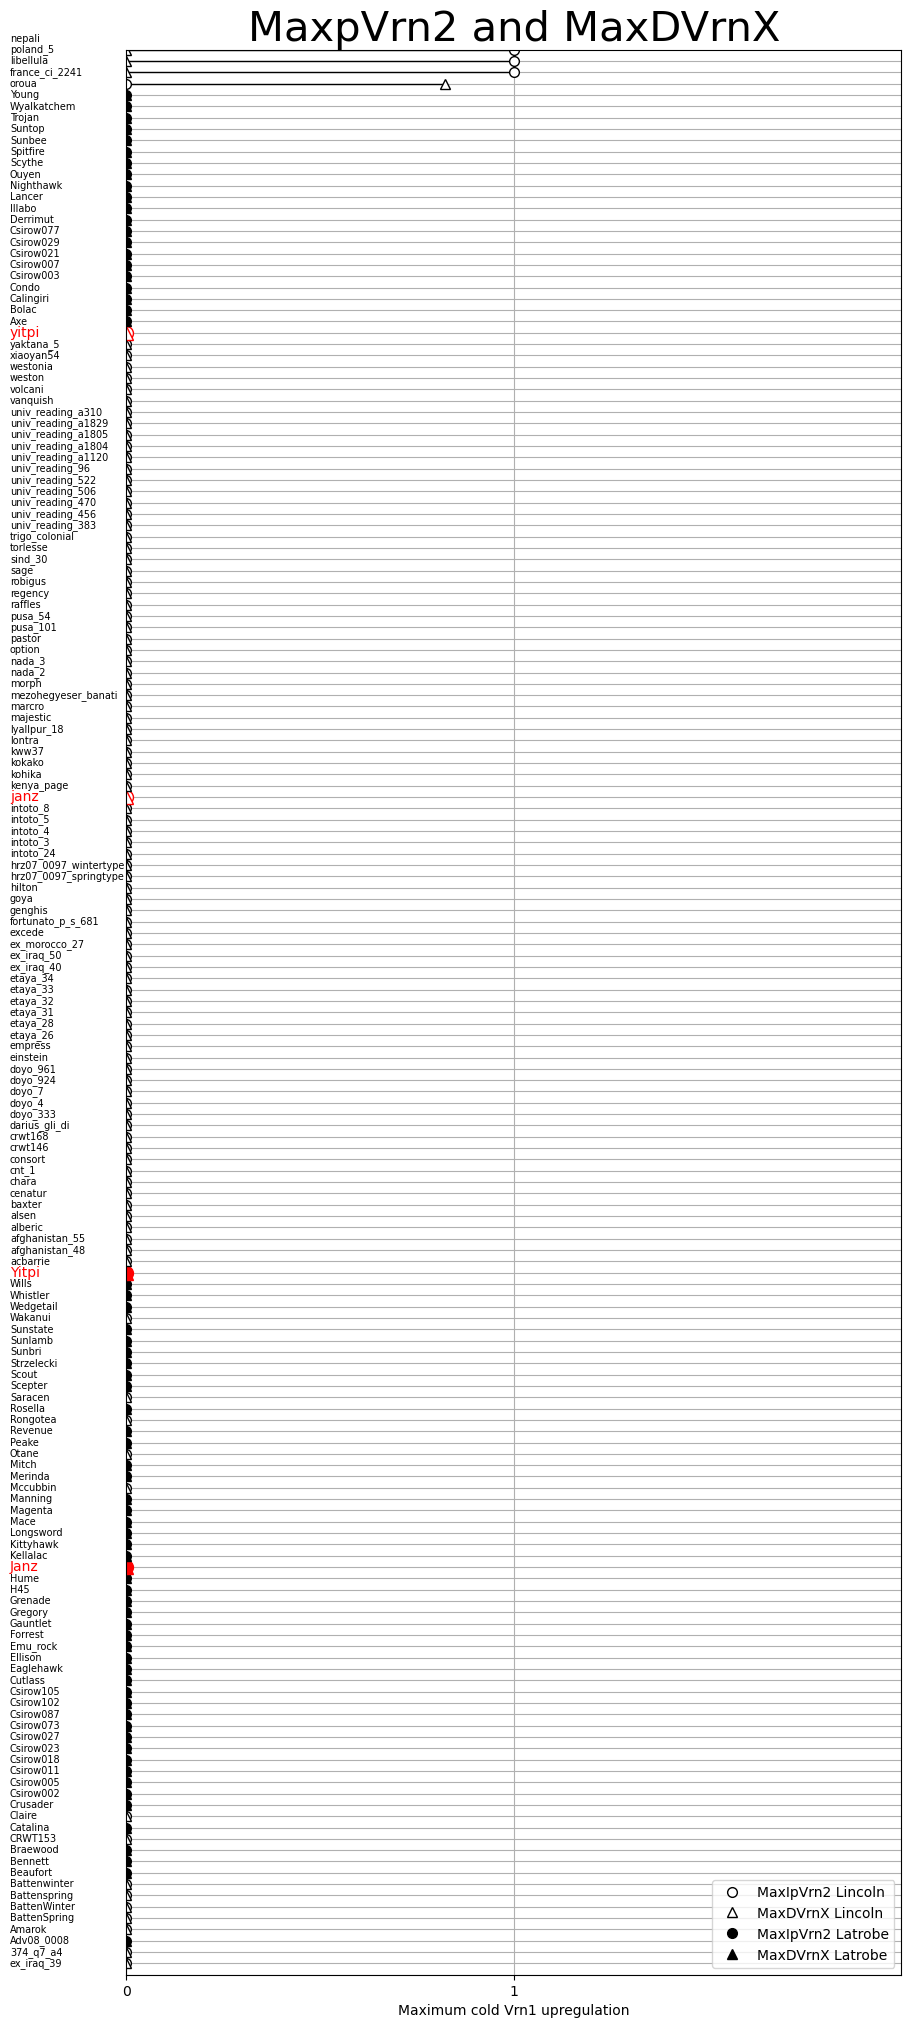

In [24]:
Graph = plt.figure(figsize=(10,25))
ax = Graph.add_subplot(1,1,1)
MakeResponsePlot(Title = 'MaxpVrn2 and MaxDVrnX',
                 highlights = ['Janz','janz','Yitpi','yitpi'],#['Otane','BattenWinter','Saracen','BattenSpring','Amarok','CRWT153'],
                 Trts = ['MaxIpVrn2','MaxDVrnX'],
                 sortT = ['MaxIpVrn2','MaxDVrnX'],
                 xlab = 'Maximum cold Vrn1 upregulation',
                 xmin = 0,
                 xmax = 2,
                 ymin = -1,
                 ymax = 169,
                 LabLegPos=0)

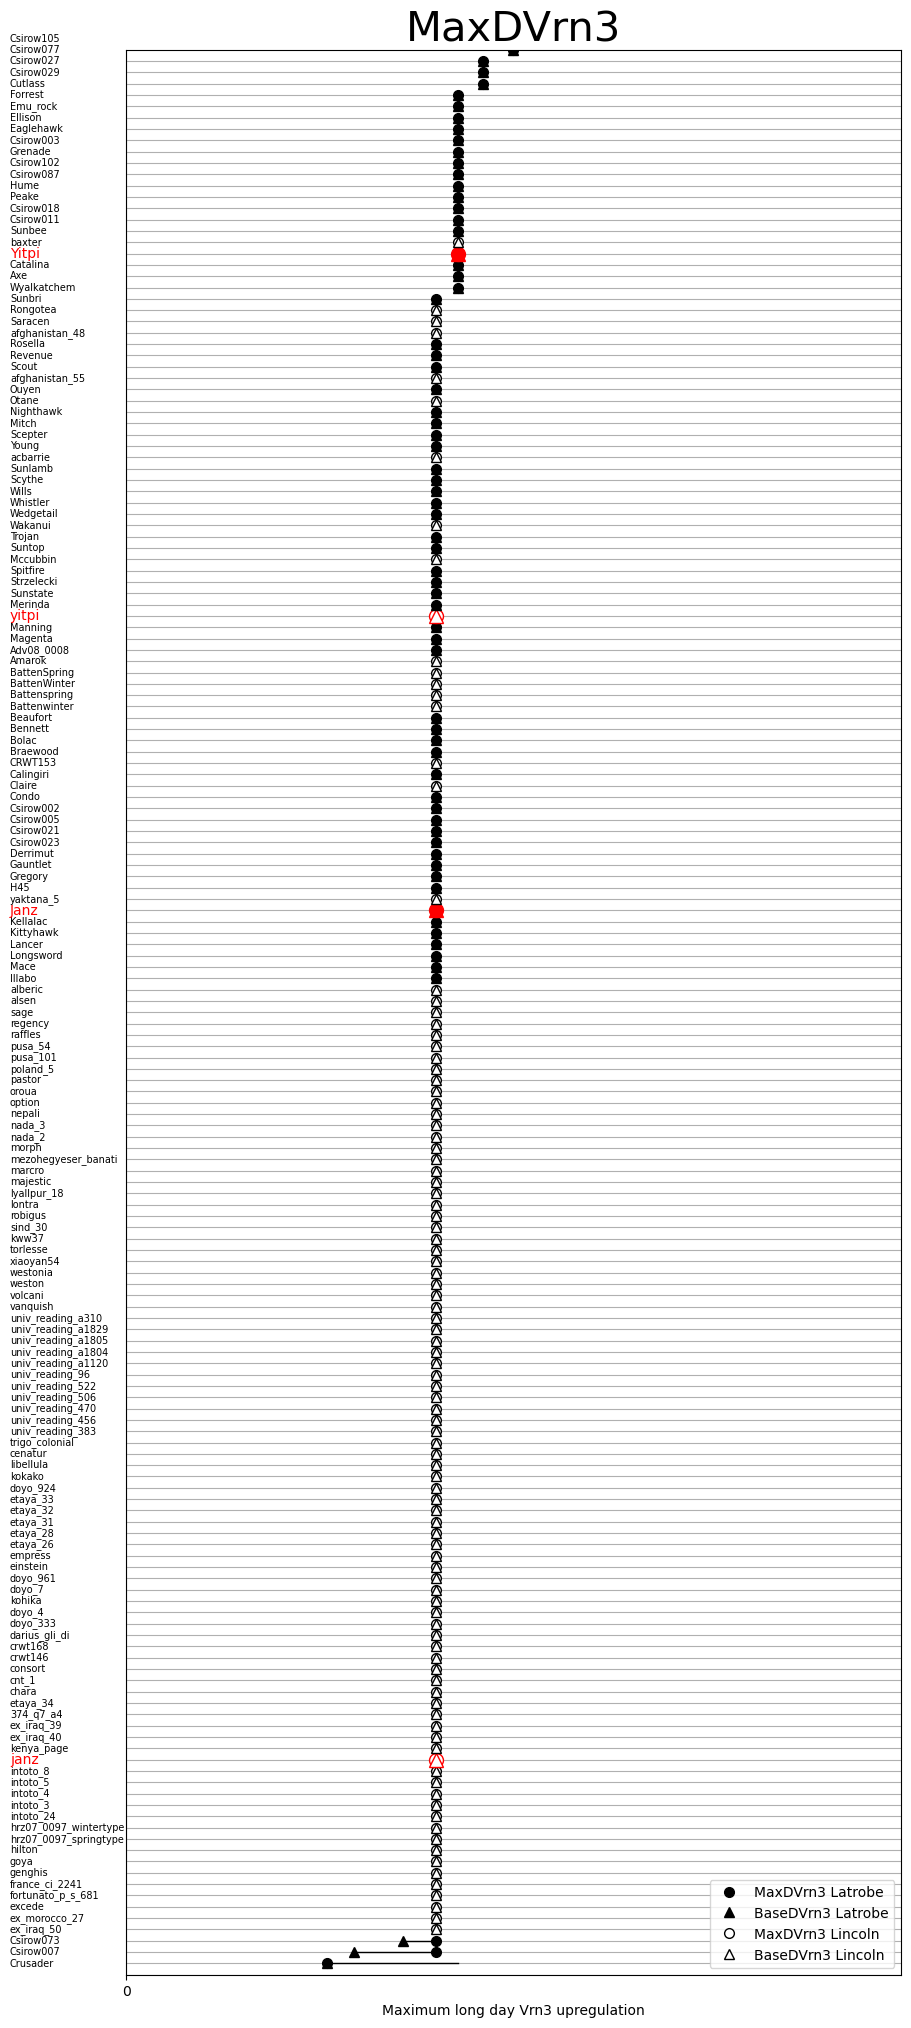

In [25]:
Graph = plt.figure(figsize=(10,25))
ax = Graph.add_subplot(1,1,1)
MakeResponsePlot(Title = 'MaxDVrn3',
                 highlights = ['Janz','janz','Yitpi','yitpi'],
                 Trts = ['MaxDVrn3','BaseDVrn3'],
                 sortT = 'BaseDVrn3',
                 xlab = 'Maximum long day Vrn3 upregulation',
                 xmin = 0,
                 xmax = 1,
                 ymin = -1,
                 ymax = 169,
                 LabLegPos=0)

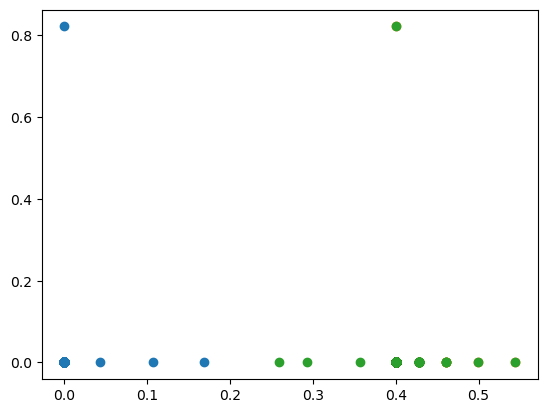

In [26]:
plt.plot(CampVrnParams.loc[:,'MaxDVrn3']-CampVrnParams.loc[:,'BaseDVrn3'],CampVrnParams.loc[:,'MaxDVrnX'],'o')
plt.plot(CampVrnParams.loc[:,'MaxDVrn3'],CampVrnParams.loc[:,'MaxDVrnX'],'o')
plt.plot(CampVrnParams.loc[:,'BaseDVrn3'],CampVrnParams.loc[:,'MaxDVrnX'],'o')

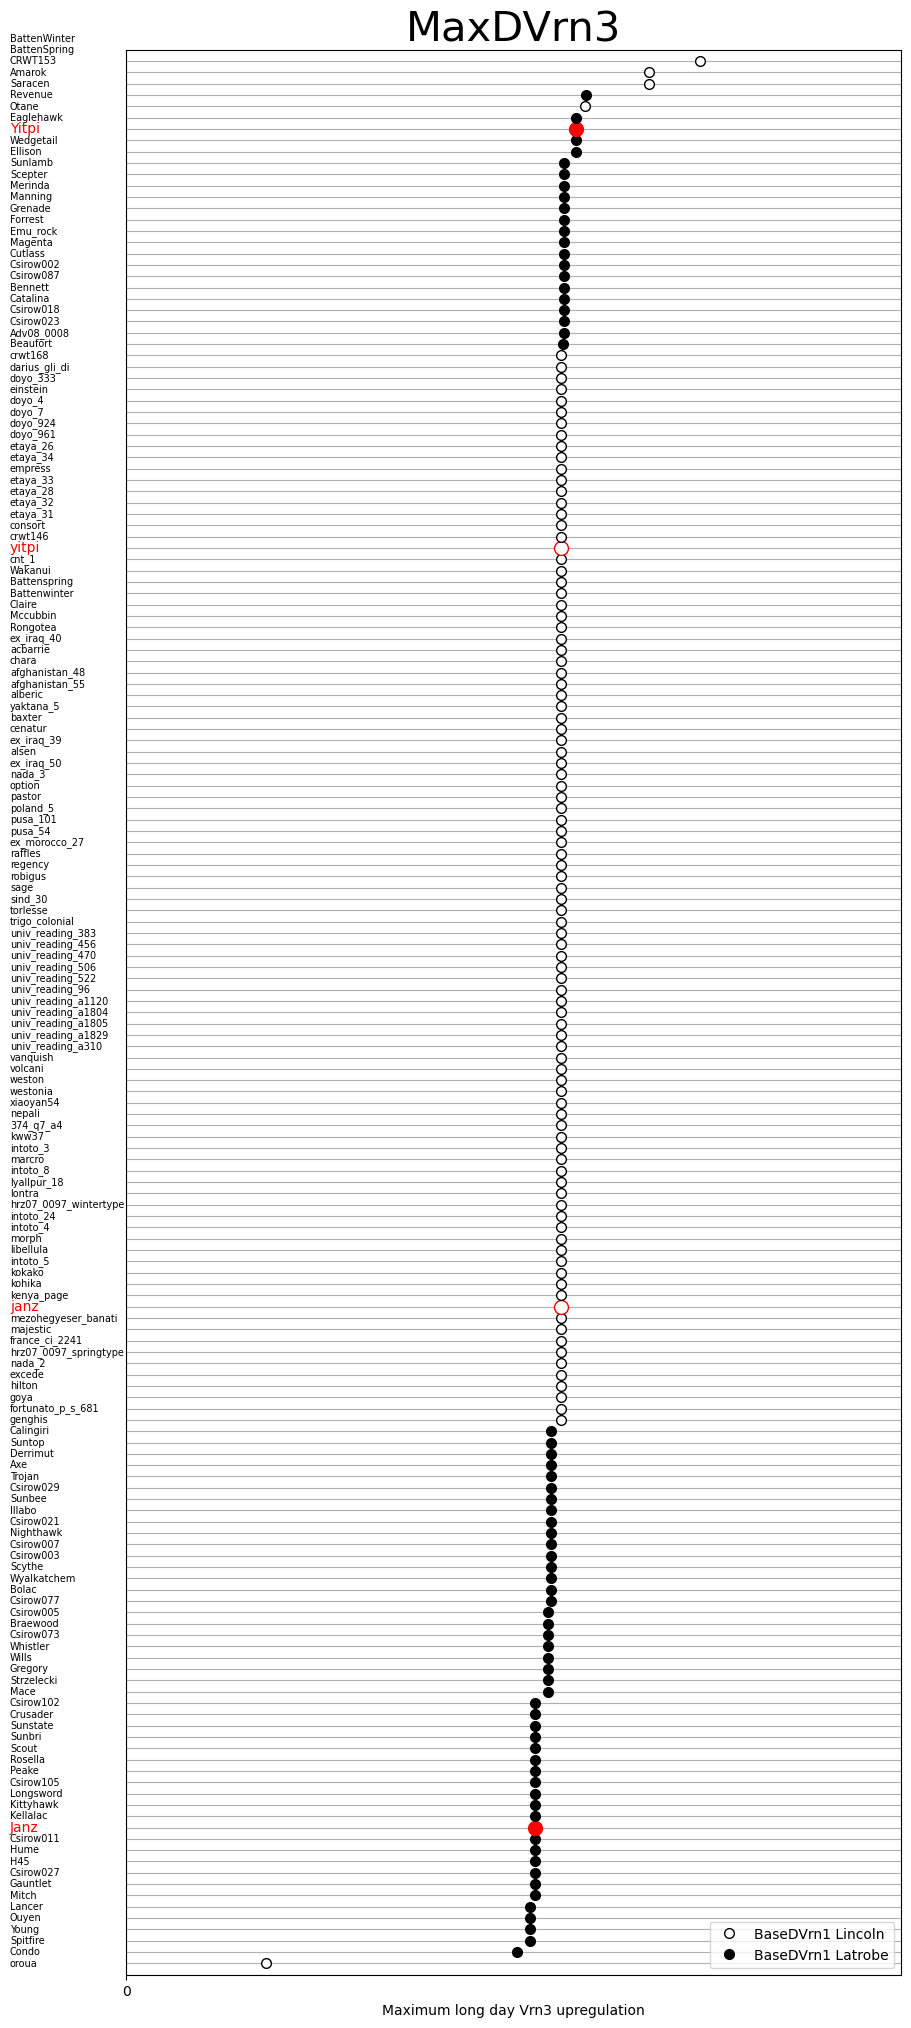

In [27]:
Graph = plt.figure(figsize=(10,25))
ax = Graph.add_subplot(1,1,1)
MakeResponsePlot(Title = 'MaxDVrn3',
                 highlights = ['Janz','janz','Yitpi','yitpi'],
                 Trts = ['BaseDVrn1'],
                 sortT = 'BaseDVrn1',
                 xlab = 'Maximum long day Vrn3 upregulation',
                 xmin = 0,
                 xmax = 1,
                 ymin = -1,
                 ymax = 169,
                 LabLegPos=0)

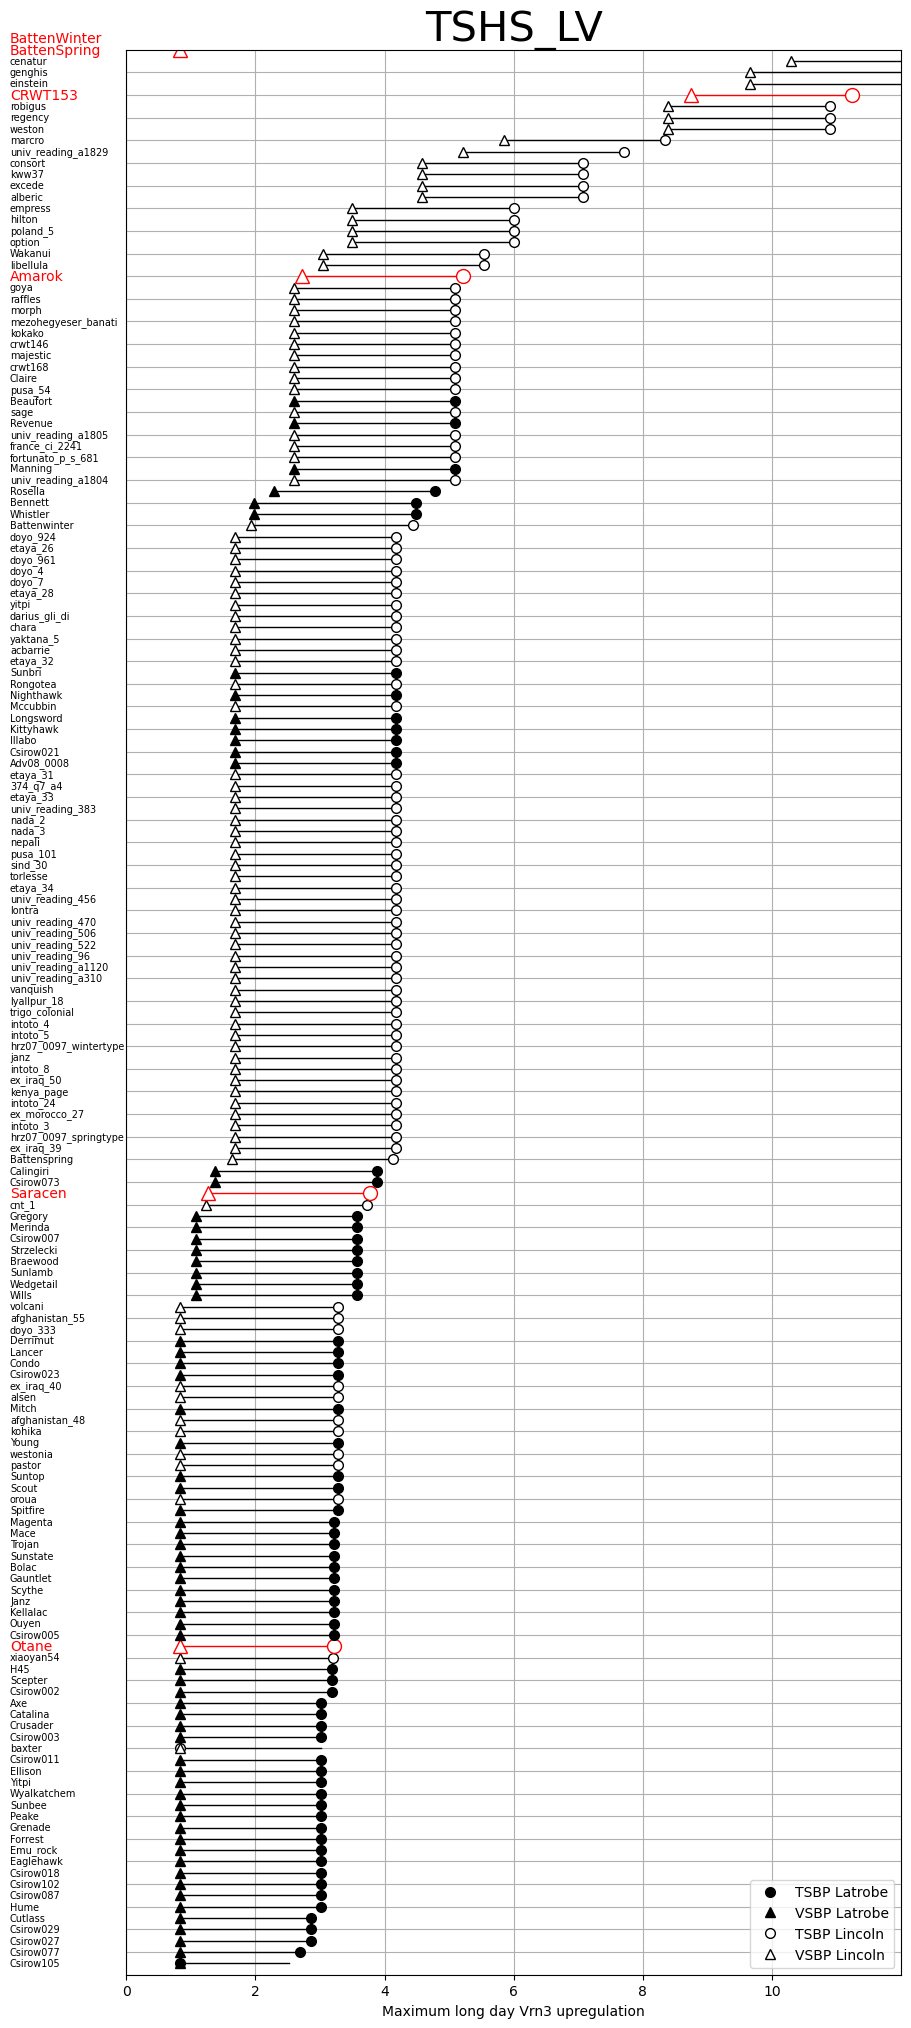

In [28]:
Graph = plt.figure(figsize=(10,25))
ax = Graph.add_subplot(1,1,1)
MakeResponsePlot(Title = 'TSHS_LV',
                 highlights = ['Otane','BattenWinter','Saracen','BattenSpring','Amarok','CRWT153'],
                 Trts = ['TSBP_LV','VSBP_LV'],
                 sortT = 'TSBP_LV',
                 xlab = 'Maximum long day Vrn3 upregulation',
                 xmin = 0,
                 xmax = 12,
                 ymin = -1,
                 ymax = 169,
                 LabLegPos=0)

In [29]:
CampVrnParams.loc[:,'PPS'] = CampVrnParams.loc[:,'FLN_SV'] - CampVrnParams.loc[:,'FLN_LV']
CampVrnParams.loc[:,'VS'] = CampVrnParams.loc[:,'FLN_LN'] - CampVrnParams.loc[:,'FLN_LV']

In [30]:
LaTrobe = CampVrnParams.loc[(CampVrnParams.Expt == 'LaTrobe'),:].copy()
LaTrobe.sort_values('PPS',inplace=True)

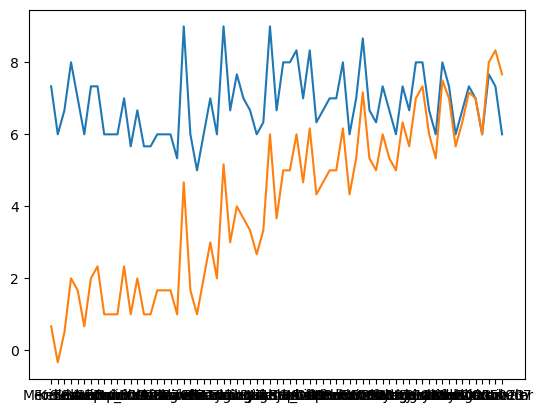

In [31]:
plt.plot(LaTrobe.loc[:,'FLN_LV'])
plt.plot(LaTrobe.loc[:,'FLN_SV'])

In [32]:
CampVrnParams.to_pickle('C:\\GitHubRepos\\npi\\Simulation\\ModelFitting\\CAMP_params.pkl')

In [33]:
CampVrnParams.columns

Index(['maxLAR', 'minLAR', 'PTQhf', 'FLN_LV', 'FLN_LN', 'FLN_SV', 'FLN_SN',
       'BasePhyllochron', 'EmergBP', 'VernTreatBP', 'MinBPVsTs', 'VSBP_FL_LV',
       'IntFLNvsTSHS', 'TSBP_LV', 'TSBP_LN', 'TSBP_SV', 'TSBP_SN', 'PPS',
       'VSBP_LV', 'VSBP_LN', 'VSBP_SV', 'VSBP_SN', 'MaxDVrn3', 'BaseDVrn3',
       'BaseDVrn1', 'VS', 'BaseVrn1AtVSBP_SV', 'MethColdVern1AtTrans_SV',
       'ColdVrn1AtVSBP_SV', 'EffectiveColdBP', 'DVrn1AtVrnTreatTemp',
       'MaxDVrn1', 'VPPS', 'pVrn2AtVSBP_LN', 'pVrn2AtVSBP_LV', 'MaxIpVrn2',
       'MaxDpVrn2', 'BaseVrn1AtVSBP_LV', 'BaseVrn1AtVSBP_LN', 'MaxDVrnX',
       'MaxMethColdVern1', 'Expt', 'MinLN', 'PpLN', 'VrnLN', 'VxPLN',
       'FastestVrn1'],
      dtype='object')

In [34]:
LaTrobe.sort_values('VS',inplace=True)

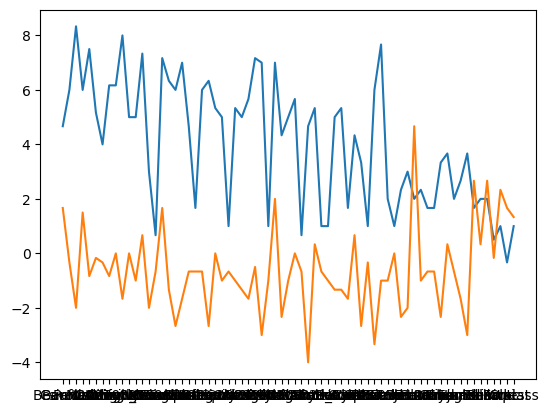

In [35]:
plt.plot(LaTrobe.loc[:,'FLN_SV'])
plt.plot(LaTrobe.loc[:,'FLN_SN'])

In [36]:
LaTrobe.index

Index(['Beaufort', 'Bennett', 'Csirow007', 'Revenue', 'Illabo', 'Manning',
       'Calingiri', 'Csirow021', 'Whistler', 'Csirow073', 'Adv08_0008',
       'Nighthawk', 'Longsword', 'Young', 'Merinda', 'Rosella', 'Csirow005',
       'Sunstate', 'Scout', 'Spitfire', 'Suntop', 'Strzelecki', 'Gregory',
       'Csirow023', 'Condo', 'Csirow029', 'Mace', 'Csirow002', 'Csirow003',
       'Wedgetail', 'Wills', 'Csirow011', 'Kittyhawk', 'Csirow102', 'Mitch',
       'Magenta', 'Axe', 'Gauntlet', 'Scythe', 'Csirow027', 'Emu_rock',
       'Csirow018', 'Sunbee', 'Csirow087', 'Scepter', 'H45', 'Csirow077',
       'Wyalkatchem', 'Crusader', 'Sunbri', 'Csirow105', 'Derrimut', 'Janz',
       'Sunlamb', 'Braewood', 'Catalina', 'Peake', 'Ouyen', 'Trojan',
       'Grenade', 'Hume', 'Lancer', 'Eaglehawk', 'Bolac', 'Ellison',
       'Kellalac', 'Yitpi', 'Forrest', 'Cutlass'],
      dtype='object', name='Cultivar')

In [37]:
for c in CampVrnParams.index:
    if (CampVrnParams.loc[c,'VPPS'] < 0) and (CampVrnParams.loc[c,'BaseDVrn1']<0.4):
        plt.plot([CampVrnParams.loc[c,'VSBP_LN'],CampVrnParams.loc[c,'VSBP_LV'],0],
              [CampVrnParams.loc[c,'pVrn2AtVSBP_LN'],CampVrnParams.loc[c,'pVrn2AtVSBP_LV'],0],'--o')

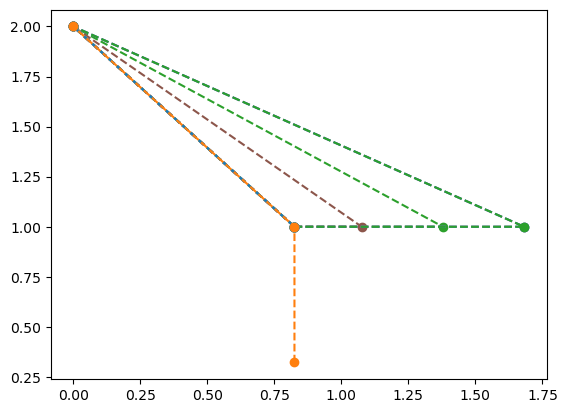

In [38]:
for c in CampVrnParams.index:
    if CampVrnParams.loc[c,'VPPS'] > 0:
        plt.plot([CampVrnParams.loc[c,'VSBP_LN'],CampVrnParams.loc[c,'VSBP_LV'],0],
              [CampVrnParams.loc[c,'pVrn2AtVSBP_LN'],CampVrnParams.loc[c,'pVrn2AtVSBP_LV'],2],'--o')

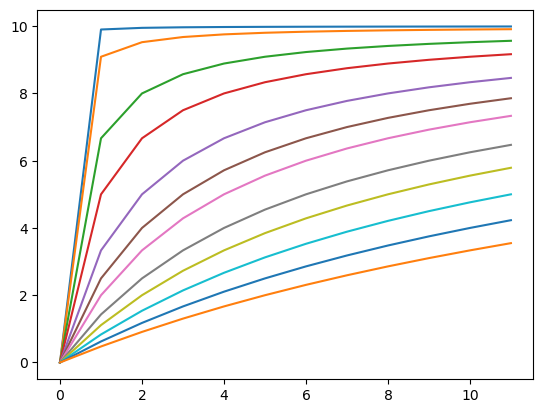

In [39]:
xs = list(range(12))
for b in [0.01,0.1,0.5,1,2,3,4,6,8,11,15,20]:
    ys= []
    for x in xs:
        ys.append((10*x)/(b+x))
    plt.plot(xs,ys)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


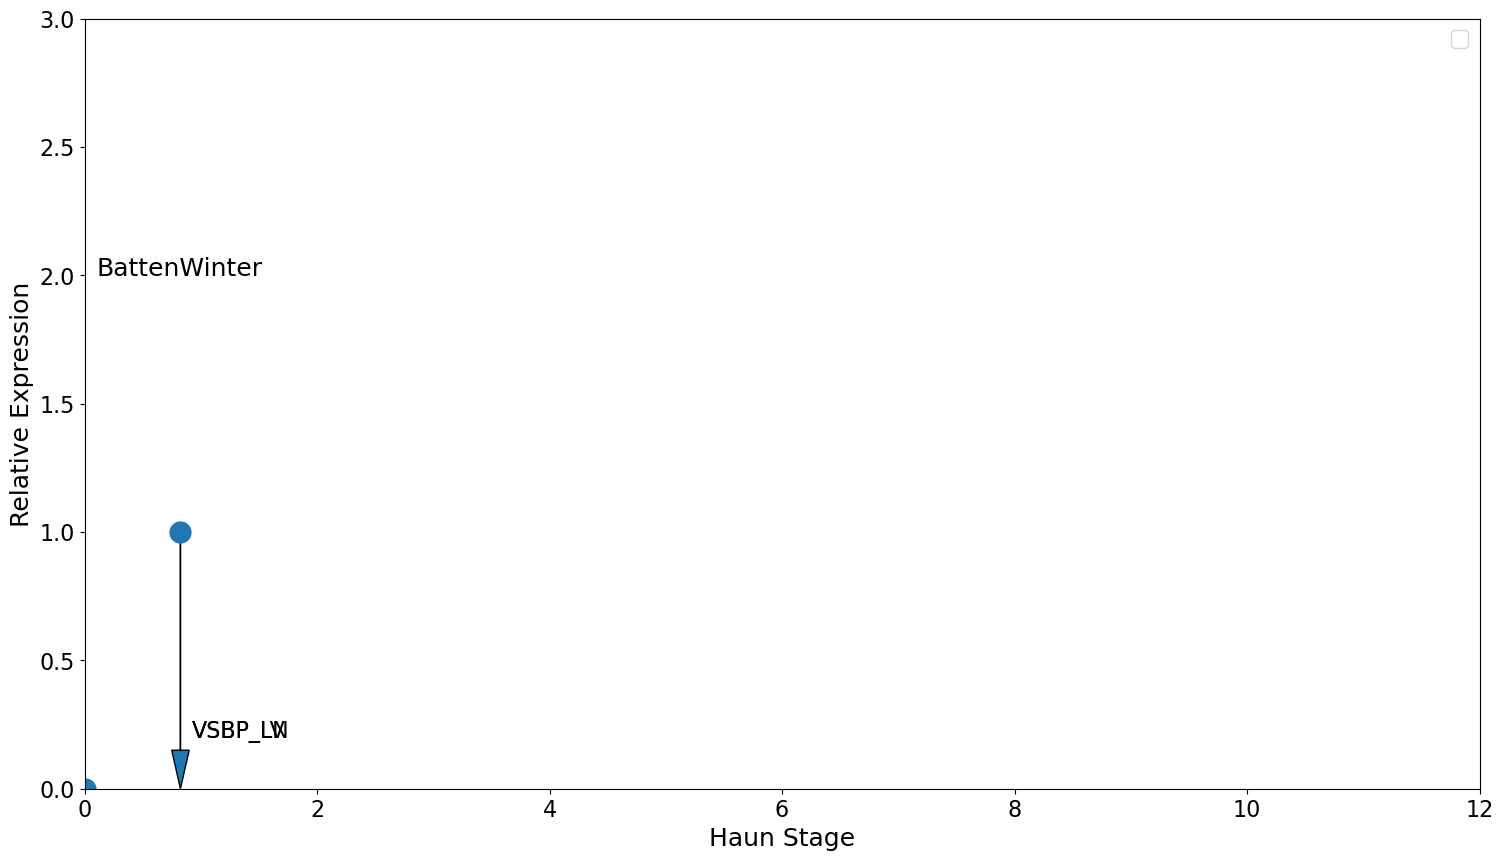

In [40]:
def CalcpVrn2(LPpHS,IpVrn2,DpVrn2):
    return IpVrn2 + LPpHS *DpVrn2
    
def vrn2resp(x,MaxpVrn2,pVrn2hf):
    return (MaxpVrn2*(x-1))/(pVrn2hf+(x-1))

LincolnCultivars = CampVrnParams.loc[CampVrnParams.Expt=='Lincoln'].index.values
Graph = plt.figure(figsize=(18,10))
apos=1
for c in ['BattenWinter']:
    ax = Graph.add_subplot(1,1,apos)
    apos+=1
    xdat = [0,CampVrnParams.loc[c,'VSBP_LV'],CampVrnParams.loc[c,'VSBP_LN']]
    ydat = [0,CampVrnParams.loc[c,'pVrn2AtVSBP_LV'],CampVrnParams.loc[c,'pVrn2AtVSBP_LN']]
    plt.plot(xdat,ydat,'o',ms=15)
    if (CampVrnParams.loc[c,'VPPS'] < 0):# and (CampVrnParams.loc[c,'BaseDVrn1']<0.4):
        xs = np.linspace(0.1,12,100)
        ys = [camp.CalcpVrn2(x,CampVrnParams.loc[c,'MaxIpVrn2'],CampVrnParams.loc[c,'MaxDpVrn2']) for x in xs]
        plt.plot(xs,ys,'-',color='k')
        V1s = [(x + CampVrnParams.loc[c,'EmergBP'])*CampVrnParams.loc[c,'BaseDVrn1'] for x in xs]
        plt.plot(xs,V1s,'--',color='b',label = 'BaseVrn1')
           
    plt.text(.1,2,c,fontsize=18)
    plt.legend(fontsize=16)
    plt.xlim(0,12)
    plt.ylim(0,3)
    plt.tick_params(labelsize=16)
    plt.ylabel('Relative Expression', fontsize=18)
    plt.xlabel('Haun Stage', fontsize=18)
    plt.text(CampVrnParams.loc[c,'VSBP_LV']+.1,0.2,'VSBP_LV',fontsize = 16)
    plt.text(CampVrnParams.loc[c,'VSBP_LN']+.1,0.2,'VSBP_LN',fontsize = 16)
    headlength = 0.15
    plt.arrow(CampVrnParams.loc[c,'VSBP_LV'],1,0,-1 + headlength,head_width=0.15,head_length=0.15)
    plt.arrow(CampVrnParams.loc[c,'VSBP_LN'],CampVrnParams.loc[c,'pVrn2AtVSBP_LN'],0,
              -CampVrnParams.loc[c,'pVrn2AtVSBP_LN']+headlength,head_width=0.15,head_length=0.15)

Graph.patch.set_facecolor('white')

In [41]:
CampVrnParams.loc['torlesse',:]

maxLAR                         0.014
minLAR                         0.005
PTQhf                            0.6
FLN_LV                           8.0
FLN_LN                          -1.0
FLN_SV                           6.5
FLN_SN                           1.0
BasePhyllochron            94.117647
EmergBP                      0.95625
VernTreatBP                  0.95625
MinBPVsTs                        2.5
VSBP_FL_LV                     4.575
IntFLNvsTSHS                    2.85
TSBP_LV                     4.181818
TSBP_LN                          0.0
TSBP_SV                     2.818182
TSBP_SN                          0.0
PPS                             -1.5
VSBP_LV                     1.681818
VSBP_LN                        0.825
VSBP_SV                        0.825
VSBP_SN                        0.825
MaxDVrn3                         0.4
BaseDVrn3                        0.4
BaseDVrn1                   0.561404
VS                              -9.0
BaseVrn1AtVSBP_SV                1.0
M

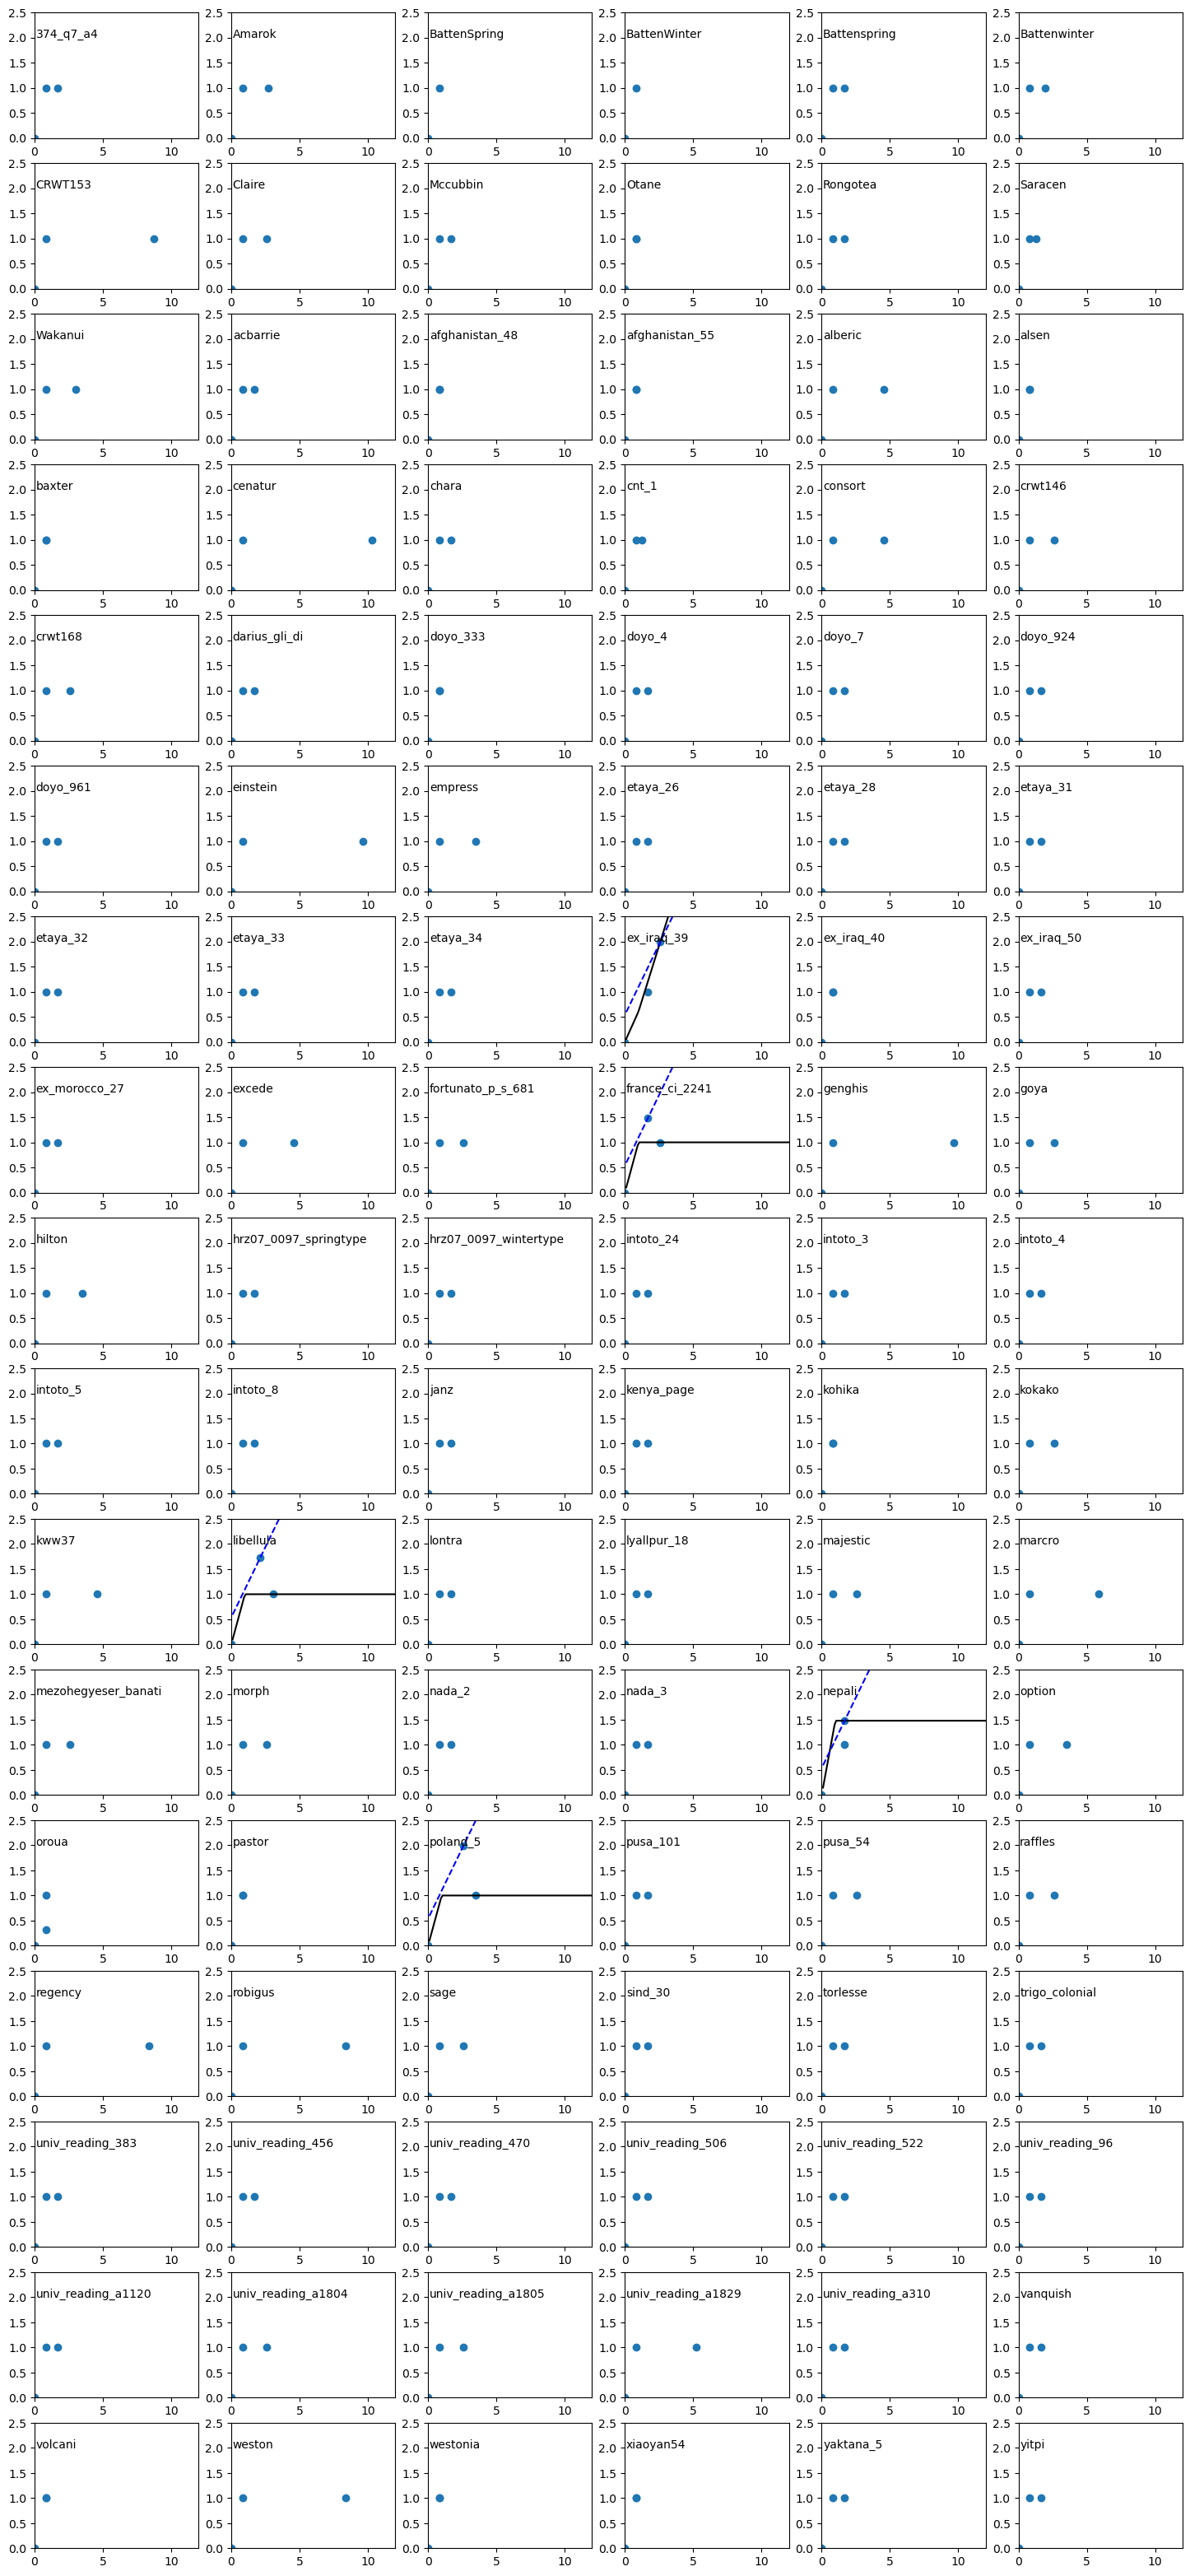

In [42]:
def vrn2resp(x,MaxpVrn2,pVrn2hf):
    return (MaxpVrn2*(x-1))/(pVrn2hf+(x-1))
LincolnCultivars = CampVrnParams.loc[CampVrnParams.Expt=='Lincoln'].index.values
Graph = plt.figure(figsize=(18,40))
apos=1
for c in LincolnCultivars:
    ax = Graph.add_subplot(17,6,apos)
    apos+=1
    xdat = [0,CampVrnParams.loc[c,'VSBP_LV'],CampVrnParams.loc[c,'VSBP_LN']]
    ydat = [0,CampVrnParams.loc[c,'pVrn2AtVSBP_LV'],CampVrnParams.loc[c,'pVrn2AtVSBP_LN']]
    plt.plot(xdat,ydat,'o')
    if (CampVrnParams.loc[c,'VPPS'] < 0):
        xs = np.linspace(0.1,12,100)
        ys = [camp.CalcpVrn2(x,CampVrnParams.loc[c,'MaxIpVrn2'],CampVrnParams.loc[c,'MaxDpVrn2']) for x in xs]
        plt.plot(xs,ys,'-',color='k')
        V1s = [(x + CampVrnParams.loc[c,'EmergBP'])*CampVrnParams.loc[c,'BaseDVrn1'] for x in xs]
        plt.plot(xs,V1s,'--',color='b')
           
    plt.text(.1,2,c)
    plt.ylim(0,2.5)
    plt.xlim(0,12)

Graph.patch.set_facecolor('white')

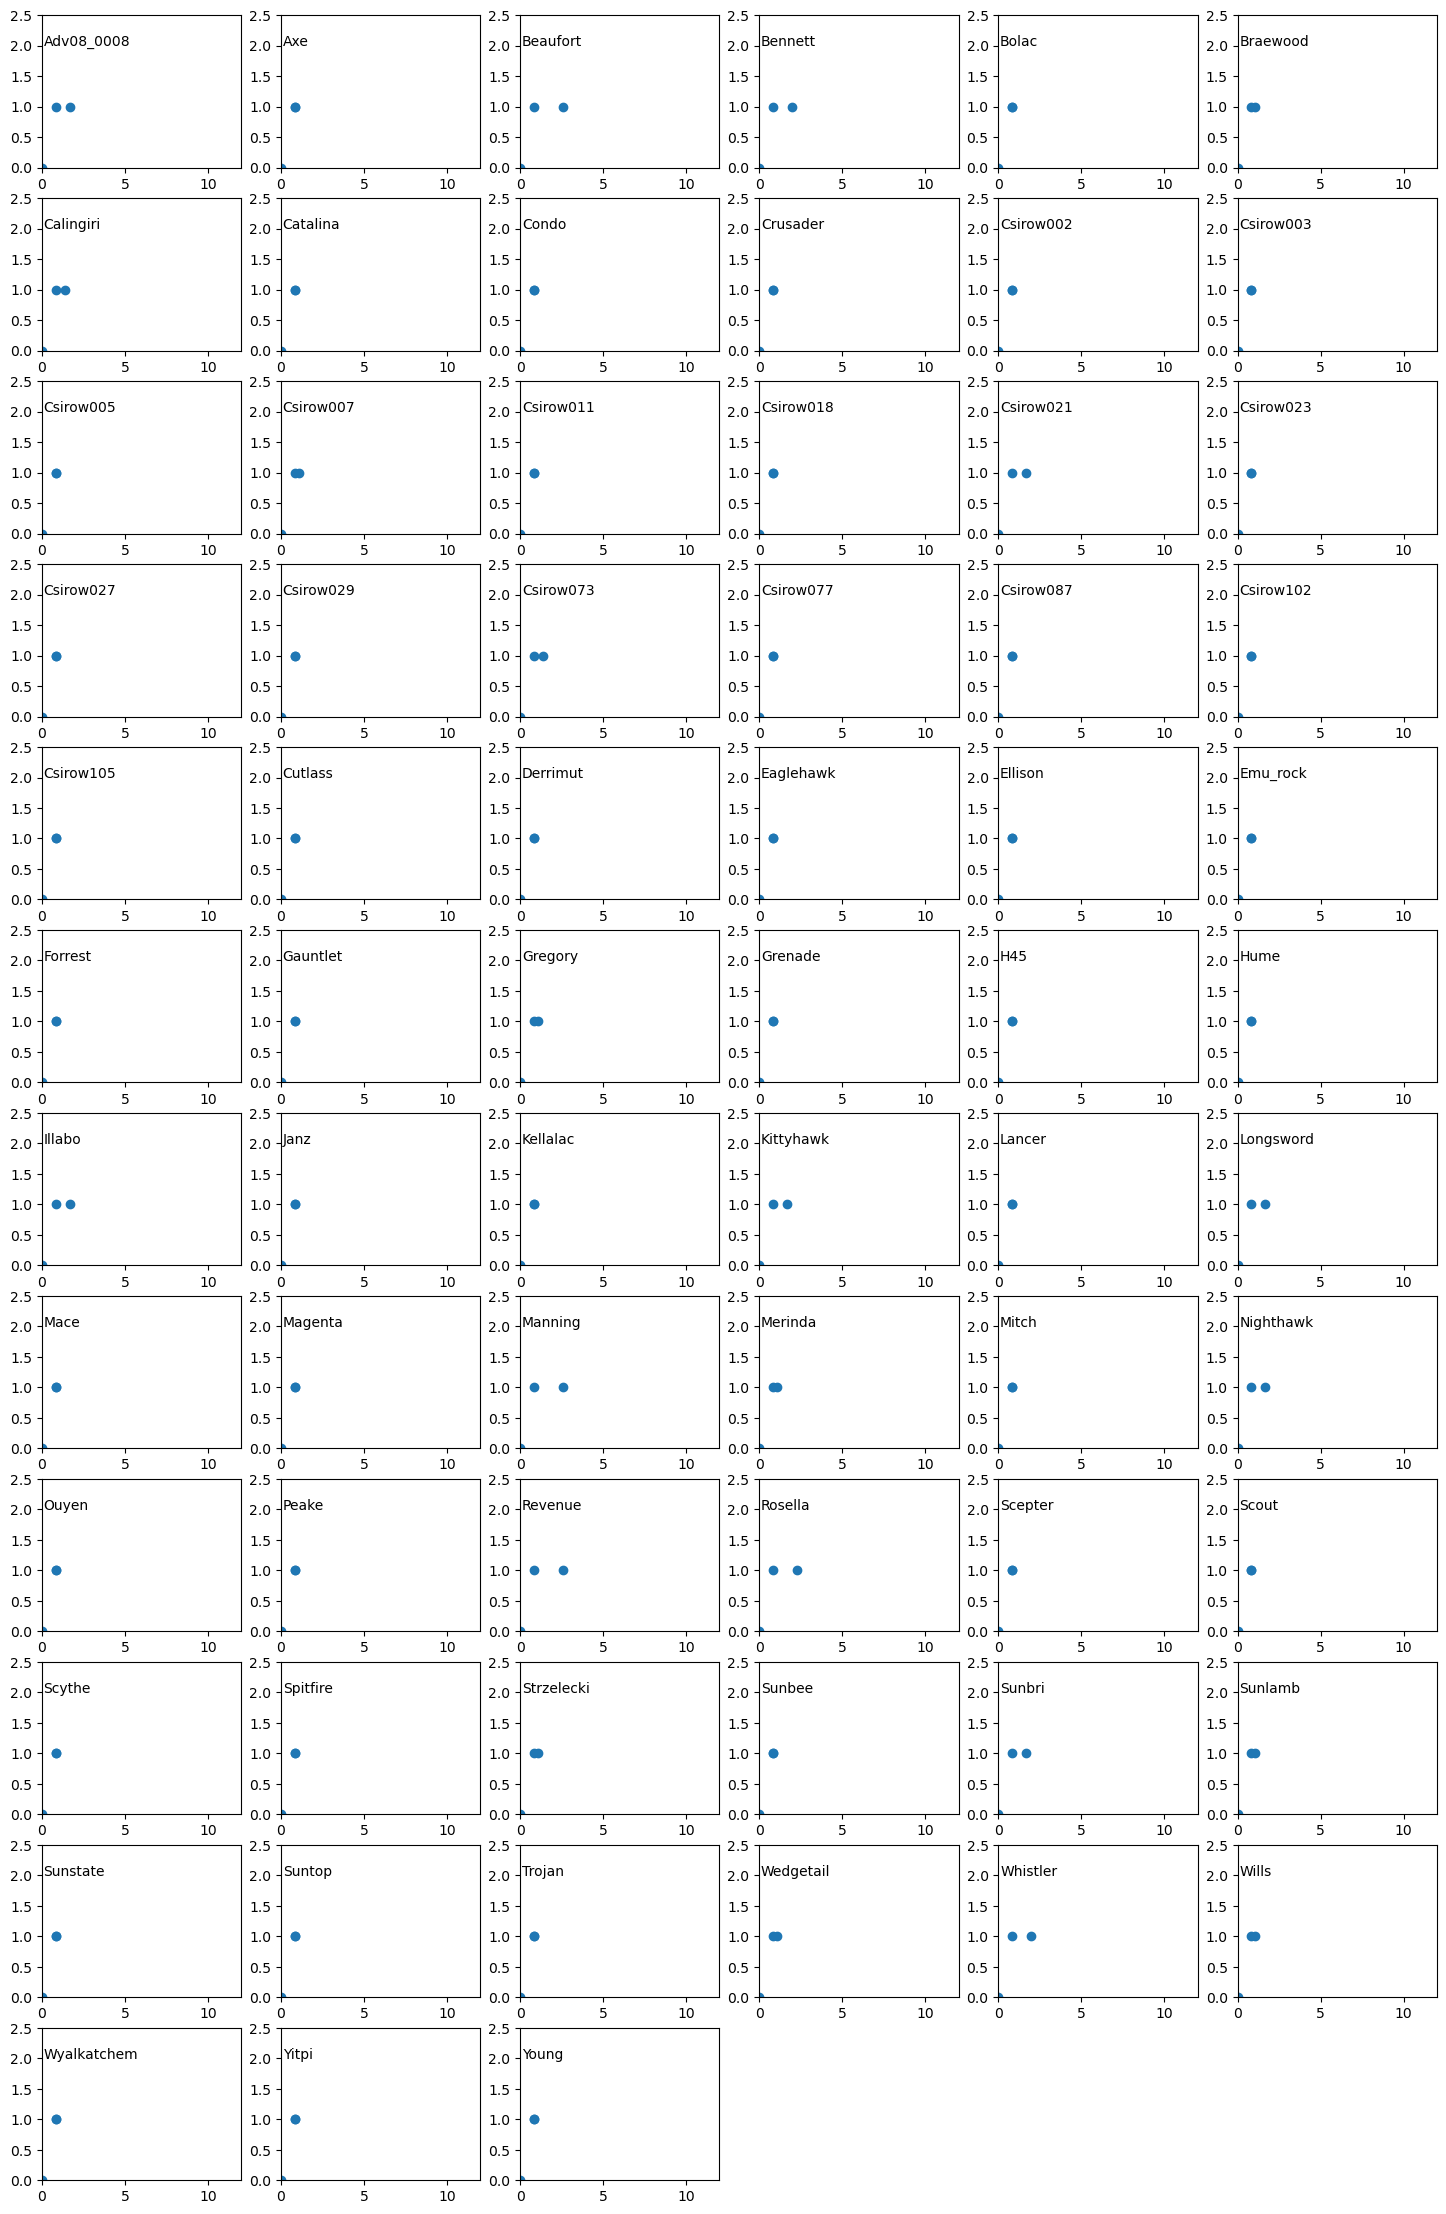

In [43]:
LaTrobeCultivars = CampVrnParams.loc[CampVrnParams.Expt=='LaTrobe'].index.values
Graph = plt.figure(figsize=(18,40))
apos=1
for c in LaTrobeCultivars:
    ax = Graph.add_subplot(17,6,apos)
    apos+=1
    xdat = [0,CampVrnParams.loc[c,'VSBP_LV'],CampVrnParams.loc[c,'VSBP_LN']]
    ydat = [0,CampVrnParams.loc[c,'pVrn2AtVSBP_LV'],CampVrnParams.loc[c,'pVrn2AtVSBP_LN']]
    plt.plot(xdat,ydat,'o')
    if (CampVrnParams.loc[c,'VPPS'] < 0): 
        xs = np.linspace(0.1,12,100)
        ys = [camp.CalcpVrn2(x,CampVrnParams.loc[c,'MaxIpVrn2'],CampVrnParams.loc[c,'MaxDpVrn2']) for x in xs]
        plt.plot(xs,ys,'-',color='k')
        V1s = [(x + CampVrnParams.loc[c,'EmergBP'])*CampVrnParams.loc[c,'BaseDVrn1'] for x in xs]
        plt.plot(xs,V1s,'--',color='b')
           
    plt.text(.1,2,c)
    plt.ylim(0,2.5)
    plt.xlim(0,12)

Graph.patch.set_facecolor('white')

In [44]:
CampVrnParams.columns

Index(['maxLAR', 'minLAR', 'PTQhf', 'FLN_LV', 'FLN_LN', 'FLN_SV', 'FLN_SN',
       'BasePhyllochron', 'EmergBP', 'VernTreatBP', 'MinBPVsTs', 'VSBP_FL_LV',
       'IntFLNvsTSHS', 'TSBP_LV', 'TSBP_LN', 'TSBP_SV', 'TSBP_SN', 'PPS',
       'VSBP_LV', 'VSBP_LN', 'VSBP_SV', 'VSBP_SN', 'MaxDVrn3', 'BaseDVrn3',
       'BaseDVrn1', 'VS', 'BaseVrn1AtVSBP_SV', 'MethColdVern1AtTrans_SV',
       'ColdVrn1AtVSBP_SV', 'EffectiveColdBP', 'DVrn1AtVrnTreatTemp',
       'MaxDVrn1', 'VPPS', 'pVrn2AtVSBP_LN', 'pVrn2AtVSBP_LV', 'MaxIpVrn2',
       'MaxDpVrn2', 'BaseVrn1AtVSBP_LV', 'BaseVrn1AtVSBP_LN', 'MaxDVrnX',
       'MaxMethColdVern1', 'Expt', 'MinLN', 'PpLN', 'VrnLN', 'VxPLN',
       'FastestVrn1'],
      dtype='object')

In [45]:
CampVrnParams.loc['Amarok','EmergBP']

0.6576923076923077

ValueError: Axis limits cannot be NaN or Inf

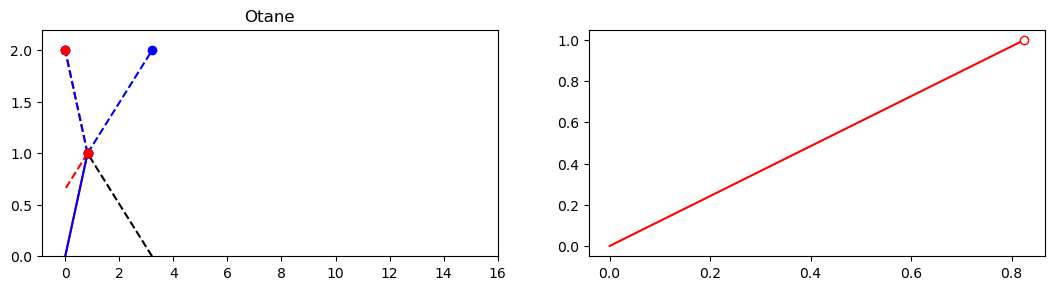

In [46]:
graph = plt.figure(figsize=(20,10))
colors = ['r','b','b','r']
fills = ['w','b','w','r']
pan=1
for c in ['Otane','BattenSpring','Saracen','BattenWinter','Amarok','CRWT153','Rosella','Wyalkatchem','Gregory']:
    ax = graph.add_subplot(3,3,pan)
    pos=0
   # c = 'BattenSpring'
    BaseDVrn1Veg = 0
    BaseDVrn1ER = 0
    for pv in ['SN','LV','SV','LN']:
        VS = CampVrnParams.loc[c,'VSBP_'+pv]
        TS = CampVrnParams.loc[c,'TSBP_'+pv]
        EmergBP = CampVrnParams.loc[c,'EmergBP']
        VernTreatBP = CampVrnParams.loc[c,'VernTreatBP']
        endVrnTreatBP =  -EmergBP + VernTreatBP
        if pv == 'SN':
            BaseDVrn1Veg = 1/(VS)
            BaseDVrn1ER = 1/(TS-VS)
            plt.plot([0,VS],[0,VS*BaseDVrn1Veg],'-',color=colors[pos])
            vstots = TS - VS
            tsTarget = 1 + (TS-VS) * BaseDVrn1ER
            plt.plot([VS,TS],[1,tsTarget],'--',color=colors[pos])
        if pv == 'LV':
            MaxDVrn1ER = 1/(TS - VS)
            plt.plot([VS,TS],[1,1+(TS-VS)*MaxDVrn1ER],'--',color = colors[pos])
            endVrnTreattoVS = VS - endVrnTreatBP
            endTreatVrn1Express = 1- (endVrnTreattoVS*BaseDVrn1Veg)
            plt.plot([endVrnTreatBP,VS],[endTreatVrn1Express,1.0],colors[pos])
        if pv == 'SV':
            plt.plot([VS,TS],[1.0,1+(TS-VS)*BaseDVrn1ER],'--',color = colors[pos])
        if pv == 'LN':
            plt.plot([VS,TS],[1,1+(TS-VS)*MaxDVrn1ER],'--',color = colors[pos])
            Vrn3PPSens = MaxDVrn1ER/BaseDVrn1ER
            Vrn2End = VS - 1/(BaseDVrn1Veg * Vrn3PPSens)
            plt.plot([Vrn2End,VS],[0,1],'--',color='k')
            #plt.plot([],[],'
        plt.plot([VS,TS],[1,tsTarget],'o',mfc = fills[pos],mec=colors[pos])
        plt.ylim(0,tsTarget*1.1)
        plt.xlim(-EmergBP,16)
        plt.title(c)
            
        pos+=1
    pan+=1
    

In [ ]:
Phenotypes.loc[(Phenotypes.BaseDVrn1<0.15) & (Phenotypes.MaxDVrnX>0)]